<!--from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))-->

---

**Sumário**
- 1. [Equações da Cinemática - Parte I](#equacoes_da_cinematica_parte_i) <br>
- 2. [Importando Pacotes](#pacotes_e_funcoes) <br>
- 3. [Movimento Retilíneo Uniforme (MRU)](#MRU) <br>
    - 3.1 [Experimento 1 - MRU [1]](#experimento_1_mru) <br>
- 4. [Analisando os dados obtidos usando Python](#analisando_os_dados_obtidos_usando_python) <br>
    - 4.1 [Apresentando os dados](#apresentando_os_dados) <br>
        - 4.1.1 [Posição dos sensores](#posicao_dos_sensores) <br>
        - 4.1.2 [Tempo cronometrado nos sensores](#tempo_cronometrado_nos_sensores) <br>
        - 4.1.3 [Calculando a média dos tempos nos sensores](#calculando_a_media_dos_tempos_nos_sensores) <br>
        - 4.1.4 [Calculando o desvio padrão dos tempos nos sensosres](#calculando_o_desvio_padrao_dos_tempos_nos_sensores) <br>
- 5 [Confeccionando o gráfico $S \times \bar{t}$](#confeccionando_o_grafico_sxt) <br>
- 6 [Ajuste do modelo linear](#ajuste_do_modelo_linear) <br>
    - 6.1 [Método dos mínimos quadrados](#metodo_dos_minimos_quadrados) <br>
    - 6.2 [Usando a função ``polyfit`` do ``numpy``](#usando_a_funcao_polyfit_do_numpy) <br>
- 7 [Comparando o modelo com os dados](#comprando_o_modelo_com_os_dados) <br>
    - 7.1 [Comparações iniciais](#comparacoes_iniciais) <br>
    - 7.2 [Comparação via gráfico](#comparacao_via_grafico) <br>
    - 7.3 [Comparação via desvio percentual](#comparacao_via_desvio_percentual) <br>
    - 7.4 [Comparação via $R^2$](#comparacao_via_r2) <br>
- 8 [Conclusões](#conclusoes)
- 9 [* Ajustando os dados com regressão linear](#ajustando_os_dados_com_regressao_linear) <br>
    - 9.1 [Importando os pacotes necessários](#importando_os_pacotes_necessarios) <br>
    - 9.2 [Reestruturando os dados](#reestruturando_os_dados) <br>
    - 9.3 [Criando o objeto de regressão linear e fitando os dados ao modelo](#criando_o_objeto_de_regressao_linear_e_fitando_os_dados_ao_modelo) <br>
    - 9.4 [Testando a qualidade do modelo: $R^2$ e gráfico](#testando_a_qualidade_do_modelo_r2_e_grafico)

<a class="anchor" id="equacoes_da_cinematica_parte_i"></a>
# Equações da Cinemática - Parte I

<p class='justified'>
A <b>cinemática</b> é a parte da física que estuda o <b>movimento dos corpos</b> sem se preocupar com o que levou o objeto a adquirir tal movimento. Como veremos nos capítulos posteriores, que a causa por de trás do movimento dos corpos é o fato uma ou mais de forças atuarem nele e mudarem seu estado conforme o tempo passa. 
</p>

<p class='justified'>
Nesses primeiros capítulos <b>analisaremos os dados obtidos</b> a partir de <b>experimentos previamente realizados</b> para obter as <b>equações de movimento</b> associadas ao objeto em questão. A obtenção dessas equações ilustrará como podemos <b>prever o comportamento</b> do objeto <b>em qualquer instante de tempo</b>, isto é, a posição em que se encontrará.
</p>

<p class='justified'>
Esse material é um complemento ao conteúdo do Cap. 3 (Pags. 22-38) do <b>Manual de Laboratório de Física Experimental I</b> <a href='#mukai'>[1]</a>.
</p>

<a class='citation' id='mukai' href="http://site.dfi.uem.br/wp-content/uploads/2018/04/Manual-de-Laborat%C3%B3rio-de-F%C3%ADsica-Experimental-I.pdf">[1] Mukai, Hatsumi e Fernandes, Paulo R. G., <i>Manual de Laboratório de Física I</i>. Universidade Estadual de Maringá, Centro de Ciências Exatas, Departamento de Física (<b>2018</b>).</a>

<a class="anchor" id="pacotes_e_funcoes"></a>
# Pacotes e Funções

<p class='justified'>
A primeira ação a ser feita para nossas análises, é <b>importar</b> os <b>pacotes</b> que contêm as funções que precisaremos para lidar com os <b>dados coletados do experimento</b>.
</p>

In [2]:
# pacotes para manipulação dos dados
import pandas as pd
import numpy as np

# pacote para confecção de gráficos para visualizar os resultados
# de uma maneira mais apreciável e criar nossos modelos
import matplotlib.pyplot as plt

# ajustando algumas configurações para melhor visualização dos gráficos
plt.rcParams['font.size'] = 16                           # altera o tamanho das fontes na figura
plt.rcParams['figure.figsize'] = 8, 6                    # altera o tamanho da figura
plt.rcParams['axes.axisbelow'] = True                    # para desenhar os grids atrás das curvas e pontos
for axis in ['xtick', 'ytick']:                          # loop para aplicar as mudanças nos eixos x e y
    plt.rcParams['{}.major.size'.format(axis)] = 10      # altera o tamanho dos ticks maiores
    plt.rcParams['{}.minor.size'.format(axis)] = 5       # altera o tamanho dos ticks menores
    plt.rcParams['{}.minor.visible'.format(axis)] = True # faz os ticks menores ficarem visíveis

<a class="anchor" id="MRU"></a>
# Movimento Retilíneo Uniforme (MRU)

<p class='justified'>
Nossos estudos, seja em qualquer disciplina, ocorrem gradualmente de assuntos mais simples e vão se tornando mais complexos/elaborados conforme avançamos. Em física, nossos estudos, em geral, iniciam-se com a Mecânica e nessa partem das <b>equações de movimento</b> de um corpo que se <b>desloca em linha reta (uma dimensão)</b> e com <b>velocidade constante</b>. 
</p>

A equação que estudaremos nesse experimento é dada pela seguinte expressão:

$$
    S(t) = S_0 + v t,
    \label{eq:mru}
$$

<p class='justified'>
em que $S(t)$ é a posição em que nosso objeto/móvel se encontra em um instante de tempo $t$, $S_0$ é a posição inicial do objeto/móvel (no tempo inicial $t=0$) e $v$ é a velocidade do objeto/móvel, que permanece constante ao longo de todo percurso.
</p>

<p class='justified'>
<b>Exemplo 1.</b> Um exemplo cotidiano e simples que "traduz" a expressão dada pela Eq. \eqref{eq:mru} é a de um carro andando sempre com a mesma velocidade. Imagine que você esteja observando um carro com uma velocidade $v = 18\, km/h = 5\, m/s$, e que essa velocidade não muda, permanece constante por todo percurso. Quando ele passa em frente a sua casa, você aperta o botão do cronômetro. Esse será o instante inicial do movimento, o $t=0{,}00\, s$, e a posição em que o carro se encontra no momento em que o cronômetro foi acionado é a posição inicial do carro $S_0$.
</p>

<p class='justified'>
A partir desse ponto, o cronômetro continua registrando o tempo e o carro continua se movimentando, em linha reta, pela rua. A cada segundo que passa no seu cronômetro, o carro se desloca $5\, m$. Se quisermos saber a posição do carro para qualquer tempo $t$, a partir do ponto $S_0$ que é sua casa, basta somarmos os incrementos na distância a cada segundo, devido ao movimento, com o valor inicial $S_0$. Nesse cenário, a Eq. \eqref{eq:mru} fica escrita como

$$
    S(t) = S_0 + (5\, m/s)t.
$$
</p>

<p class='justified'>
O valor de $S_0$ é escolhido de maneira que os cálculos fiquem mais conveninentes. Por exemplo, ele pode ser escolhido na origem do sistema de coordenadas, de maneira que $S_0 = 0$ e, portanto,
</p>

$$
    S(t) = (5\, m/s)t.
    \label{eq:carro}
$$

<p class='justified'>
Portanto, no início da análise do movimento, no tempo $t=0$, o carro se encontra em frente a sua casa:
</p>

$$
    S(t=0) = (5\, m/s)(0s) = 0 m,
$$

<p class='justified'>
que corresponde exatamente a posição definida no começo da contagem do tempo: $S_0 = 0$.
</p>

Observe ainda que $S(t)$ é sempre uma posição final analisada, isto é, para um instante de tempo $t$ qualquer. Assim, podemos escrever

$$
    S(t) - S_0 = vt
$$

e como a posição final menos a inicial é uma variação na quantidade de espaço percorrido, podemos escrever:

$$
    \Delta S (t) = vt.
$$

<p class='justified'>
Essa equação nos diz que o deslocamento do carro após ser transcorrido um tempo $t$ é sempre o mesmo independente da escolha do ponto de referência inicial. Em outras palavras, se a velocidade permanecer $v = 5\, m/s$ o carro sempre vai percorrer uma distância de $15\, m$ quando os três segundos se passarem, independente do ponto de referência $S_0$ escolhido. 
</p>

<p classs='justified'>
A seguir, vamos analisar a equação de movimento do carro dada pela Eq. \eqref{eq:carro} de forma gráfica utilizando o <mark class='mono_gray'>Python</mark>. O gráfico do comportamento desse veículo quando colhemos os dados das posições em $t=[0,2,4,6,8,10]\, s$, a partir de $S_0 = 0\, m$. 
</p>

<p classs='justified'>
<b>a)</b> Definindo as variáveis, dependente e independente e confeccionando o gráfico digitando os dados.
</p>
    
<p classs='justified'>
    Nossa <b>variável independente</b> é o <b>tempo</b> e a <b>variável dependente</b> é a posição do carro, que depende do tempo. Dessa forma, colocamos o tempo $t$ no eixo $x$ e a posição do carro $S(t)$ no eixo $y$.
</p>

<a class='cell' id='figure_1'></a>

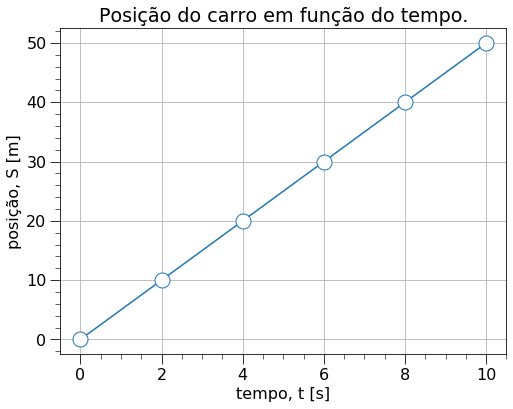

In [3]:
# variavel independente: eixo x, é o tempo que cronometramos
tempos_cronometrados = [0, 2, 4, 6, 8, 10]
# variavel dependente: eixo y, é a posição do carro
def s(s0, v, t):
    return s0 + v*t

# calculamos os valores para a posição em função do tempo
# usamos os valores de tempo cronometrados, encontrados 
# na lista definida acima - tempos_cronometrados - 
# para calcular os valores da posição do veículo. 
# Usaremos a posição inicial s0 = 0 m e a velocidade 
# constante v = 5,0 m/s. Para isso, usaremos uma
# ``lista de compreensão`` (list comprehension)
posicoes = [s(s0=0, v=5, t=t) for t in tempos_cronometrados];

# confeccionando o gráfico
plt.plot(
    tempos_cronometrados,     # primeiro argumento são os valores do eixo x
    posicoes,                 # segundo argumento são os valores do eixo y
    marker='o',               # tipo do ponto usado para marcar as coordenadas (x,y)
    markersize=15,            # muda o tamanho dos pontos
    markerfacecolor="#FFFFFF" # muda a cor interna dos pontos
);

# desenha as linhas que acompanham os valores nos eixos
plt.grid()

# é importante colocar o nome das quantidade nos eixos
plt.xlabel('tempo, t [s]');
plt.ylabel('posição, S [m]');
plt.title('Posição do carro em função do tempo.');

<p class='justified'>
<b>Figura 1.</b> Gráfico da Posição $S$ (m) do carro versus tempo $t$ (s).
</p>

<p class='justified'>
<b>b)</b> Agora vamos criar o mesmo gráfico usando a biblioteca <mark class='mono_gray'>pandas</mark>. 
</p>

<p class='justified'>
O primeiro passo é criar um <mark class='mono_gray'>DataFrame</mark> e então adicionar as colunas com os dados que temos.
</p>

In [5]:
# criamos um DataFrame usando o pandas -> pd.DataFrame
df_dados_exemplo = pd.DataFrame()
df_dados_exemplo['tempo, t [s]']   = tempos_cronometrados # adicionamos uma coluna com os tempos
df_dados_exemplo['posição, S [m]'] = posicoes # adicionamos outra coluna com as posições

df_dados_exemplo.style.set_caption('Tabela 1. Dados do tempo e sua respectiva posição, obtida por meio do Eq. (3).')

,"tempo, t [s]","posição, S [m]"
0,0,0
1,2,10
2,4,20
3,6,30
4,8,40
5,10,50


<p class='justified'>
Observe que a mesma estrutura de dados pode ser criada usando um dicionário como argumento:
</p>

```python
pd.DataFrame({
    'tempo, t [s]'  : tempos_cronometrados,
    'posição, S [m]': posicoes
})
```

<a class='cell' id='figure_2'></a>

Text(0, 0.5, 'posição, S [m]')

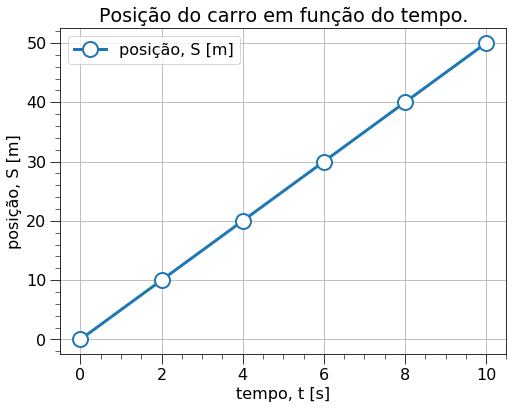

In [6]:
# agora confeccionamos o gráfico que nos diz
# como a posição do carro evolui com o tempo
plot_dados_exemplo = df_dados_exemplo.plot(
    x='tempo, t [s]',        # valores das variáveis independentes: eixo x
    y='posição, S [m]',      # valores das variáveis dependentes: eixo y
    style='-o',              # desenha as linhas que ligam os marcadores 'o'
    markersize=15,           # escolhe o tamanho do marcador/ponto
    markerfacecolor="white", # cor do interior do ponto
    markeredgewidth=2,       # escolhe a espessura da borda do marcador/ponto
    lw=3,                    # escolhe a espessura da linha que liga os pontos
    xlim=(-0.5, 10.5),       # muda o intervalo do eixo-x
    grid=True,               # desenha as linhas que acompanham os valores nos eixos    
    title='Posição do carro em função do tempo.' # adiciona título ao gráfico
);

plot_dados_exemplo.set_ylabel('posição, S [m]') # colocamos o label no eixo-y

<p class='justified'>
    <b>Figura 2.</b> Gráfico da Posição $S$ (m) do carro versus tempo $t$ (s), confeccionados via biblioteca <mark class='mono_gray'>Pandas</mark>.
</p>

<p class='justified'>
    Observe que usando os dados provenientes de um <mark class='mono_gray'>pd.DataFrame</mark> confeccionamos o gráfico de maneira mais fácil e os <mark class='mono_gray'>labels</mark> (rótulos) dos eixos já são colocados automaticamente respeitando os nomes das colunas fornecidas.
</p>

<p class='justified'>
Observe que os gráficos das <b>Figuras 1 e 2</b>, fornecem uma reta, o correto seria ajustar primeiramente o mesmo via regressão linear (será apresentado posteriormente) e traçar a reta, para calcularmos o seu <b>coeficiente angular</b>. Mas, no momento, consideremos um gráfico linear (reta), para analisar o seu significado físico. Calcular o coeficiente angular fornecerá exatamente a velocidade do carro. Para mostrar isso, podemos pegar quaisquer dois pontos do gráfico. Para nossa demonstração, iremos pegar os pontos:
</p>

<br>
<div align='center'>
    <b>Tabela 2.</b> Dados de dois pontos da reta do gráfico da Figura 2.

| tempo, $t$ [s] | posição, $S$ [m] |
|:--------------:|:----------------:|
|        4       |        20        |
|        6       |        30        |
</div>

<p class='justified'>
O <b>coeficiente angular</b> $\alpha$ é obtido calculando a expressão
</p>

$$
    \alpha = \frac{\Delta y}{\Delta x}.
$$

<p class='justified'>
No caso do nosso exemplo, o coeficiente da reta é dado por
</p>

$$
    \alpha = \frac{\Delta S}{\Delta t}.
$$

<p class='justified'>
Usando os dados na <b>Tabela 2</b>, temos
</p>

$$ 
    \alpha = \frac{30\,m - 20\,m}{6\,s - 4\,s} = \frac{10\,m}{2\,s} = 5\,m/s,
$$

<p class='justified'>
que é igual a velocidade do carro. Então, em um movimento retilíneo uniforme, o coeficiente angular de um gráfico da posição em função do tempo ($S\times t$) é igual a velocidade constante do veículo.
</p>

<p class='justified'>
    No experimento descrito na referência <a href='#mukai'>[1]</a> - Capítulo 2, será feita uma análise muito parecida com a que fizemos de maneira breve nessa sessão. 
</p>

<a class="anchor" id="experimento_1_mru"></a>
## Experimento 1 - MRU [1]

<p class='justified'>
O experimento realizado no <b>Laboratório de Física Geral I</b> para se estudar o <b>movimento retilíneo uniforme (MRU)</b> tem como <b>objetivo</b> obter, a partir dos dados experimentais, uma função para a posição $S(t)$ de um móvel deslizando sobre um plano horizontal e sem atrito. A partir dos dados obtidos, iremos confeccionar um gráfico da posição em função do tempo (como feito na sessão anterior) para obter a velocidade (constante) do móvel. Iremos considerar em todos os nossos cálculos os conceitos da teoria de erros (Ref. <a href='#mukai'>[1]</a>, Cap. 2, págs. 6-21).
</p>

<p class='justified'>
O experimento abordado em laboratório consiste, de maneira resumida, em um trilho de ar no qual um móvel desliza sem atrito. Esse móvel passa por sensores, cujas posições são conhecidas, que estão acoplados a um cronômetro. Dessa maneira, o tempo que o móvel passa por cada sensor durante o movimento é cronometrado (para mais detalhes ler a descrição experimental na Ref. <a href='#mukai'>[1]</a>, Cap. 3, págs. 32-36).
<p>

<p class='justified'>
No experimento, o primeiro sensor é posicionado a uma distância de $40,00\,cm$ da posição inicial do móvel (em repouso). Os outros quatro sensores são dispostos no trilho de ar de maneira que entre eles tenha uma distância de $15,00\,cm$. Assim, temos as posições dos sensores dadas por (Tabela 3):
</p>

<br>
<div align='center'>
<b>Tabela 3.</b> Dados da posição $S(t)$ de cada sensor distribuído sobre o trilho de ar.

| Sensor | Posição $S(t)$ [cm] |
|:------:|:-------------------:|
|    1   |       $0{,}00$      |
|    2   |      $15{,}00$      |
|    3   |      $30{,}00$      |
|    4   |      $45{,}00$      |
|    5   |      $60{,}00$      |
</div>

<p class='justified'>
No momento em que o móvel passa pelo primeiro sensor, o cronômetro é ativado ($t=0{,}000\, s$). A análise do movimento desse móvel começa então exatamente nesse ponto, e portanto esse é o nosso ponto inicial $S_0 = 0{,}00\,cm$. 
</p>

<p class='justified'>
Existe um fio que passa por uma roldana sendo que uma das extremidade do fio está amarrado no móvel e a outra em um suporte de massas. Para simular um movimento retilíneo uniforme, coloca-se uma determinada quantidade de massas nesse suporte. Este conjunto se encontra muito próximo à bancada, em que se encontra todo o aparato experimental exceto o compressor de ar. Desse modo, o suporte de massa entra em repouso sobre a bancada antes do móvel passar pelo primeiro sensor. É esse mecanismo que causa o movimento inicial do móvel (tirando-o do repouso) e depois não existe mais nenhuma força externa resultante atuando sobre ele, característica do MRU. O processo de movimento é realizado sobre m colchão de ar, tornando possível desprezar o atrito entre o móvel e o trilho.
</p>

<p class='justified'>
Após o nivelamento do trilho, para garantir que o movimento seja realizado na horizontal (garantindo náo ter uma força externa resultante atuando no sistema), a coleta dos dados consiste em anotar os tempos,registrados pelo cronômetro, conforme o móvel passa pelos sensores. 
</p>

<p class='justified'>
O procedimento experimental é repetido por quatro vezes, para cada posição do sensor, de modo que teremos quatro tempos para cada um dos sensores. Devemos então anotar os valores na tabela abaixo:
</p>

<br>
<div align='center'>
    <b>Tabela 4.</b> Dados da posição $S(t)$ de cada sensor distribuído sobreo o trilho de ar e o tempo $t\,[s]$ para cada repetição, e $t_m$ o tempo médio.
    
| $S\ [cm]$ | $t_1\, [s]$ | $t_2\, [s]$ | $t_3\, [s]$ | $t_4\, [s]$ | $t_m, [s]$ |
|:---------:|:-----------:|:-----------:|:-----------:|:-----------:|:--------------:|
|      0,00 |             |             |             |             |                |
|     15,00 |             |             |             |             |                |
|     30,00 |             |             |             |             |                |
|     45,00 |             |             |             |             |                |
|     60,00 |             |             |             |             |                |
</div>

<p class='justified'>
Cada uma das colunas representa uma tomada de dados do experimento em que os tempos cronometrados quando o móvel passa por cada um dos 4 deve ser anotado. Após as quatro realizações, devemos preencher o valor médio $t_m$, ou seja, a soma dos tempos aferidos para um dado sensor. Por exemplo, o tempo médio para o segundo sensor, que se encontra na posição de $15{,}00\,cm$ seria a soma dos tempos na segunda linha da tabela dividido por quatro.
</p>

<p class='justified'>
Após coletado os dados e calculado o valor médio do tempo em que o móvel passa por cada um dos sensores, iremos analisar os resultados. Para isso,
</p>

<p class='justified'>
<b>1.</b> confeccionar um gráfico de $S \times t_m$; <br>
<b>2.</b> identificar o tipo de relação entre essas variáveis (que deve ser linear); <br>
<b>3.</b> ajustar os dados a um modelo teórico (equação da reta) usando o método dos mínimos quadrados; <br>
<b>4.</b> realizar uma análise dimensional para identificar a dimensão do coeficiente angular da reta; <br>
<b>5.</b> escrever a equação final que melhor ajusta os dados coletados.
</p>

<a class="anchor" id="analisando_os_dados_obtidos_usando_python"></a>
# Analisando os dados obtidos usando Python

<p class='justified'>
Nessa seção iremos trabalhar com a análise dos dados do experimento do movimento retilíneo uniforme (MRU). Os dados trabalhados aqui foram obtidos por alunos de uma turma do primeiro ano de Engenharia Civil no ano de 2019 (Tabela 5). A partir de nossas análises, passo a passo, você deverá ganhar intuição e conseguir, com seus próprios dados experimentais fazer a mesma análise.
</p>

<div align='center'>
<b>Tabela 5.</b> Dados da posição $S(t)$ [cm] de cada sensor distribuído sobre o trilho de ar e o tempo $t$ [s] para cada repetição, e $t_m$ o temó médio.


| S [cm] | t1 [s] | t2 [s] | t3 [s] | t4 [s] | $t_m, [s]$ |
|:------:|:------:|:------:|:------:|:------:|:--------------:|
|    0   |   0.0  |  0.000 |  0.000 |  0.000 |      0.000     |
|    1   |  15.0  |  0.901 |  0.909 |  0.906 |      0.904     |
|    2   |  30.0  |  1.836 |  1.840 |  1.824 |      1.831     |
|    3   |  45.0  |  2.760 |  2.746 |  2.800 |      2.773     |
|    4   |  60.0  |  3.658 |  3.620 |  3.776 |      3.684     |
</div>

<p class='justified'>
Para o arredondamento dos valores do tempo médio foi considerado o número de algarismos significativos e não considerando o desvio da média.
</p>

<a class="anchor" id="apresentando_os_dados"></a>
## Apresentando os dados

<p class='justified'>
Os primeiros dados que temos desse experimento são as posições de cada um dos sensores. Assim, definiremos uma lista com os valores dessas posições. Observe que o separador decimal é o ponto ao invés da vírgula.
</p>

<a class="anchor" id="posicao_dos_sensores"></a>
### Posição dos sensores

In [3]:
# lista com os valores das posições dos sensores
# essa variável será a mesma para suas análises individuais
posicao_sensores = [0.00, 15.00, 30.00, 45.00, 60.00] # em cm
posicao_sensores

[0.0, 15.0, 30.0, 45.0, 60.0]

<a class="anchor" id="tempo_cronometrado_nos_sensores"></a>
### Tempo cronometrado nos sensores

<p class='justified'>
Os próximos dados são os tempos que foram anotados no cronômetro quando o móvel passava por cada um dos sensores. Para cada uma das rerepetições do procedimento experimental, definiremos uma lista da seguinte forma
</p>

```python
    tempos_realizacao_n = [
        t_0,  # tempo no sensor 1 -  0.00cm
        t_15, # tempo no sensor 2 - 15.00cm
        t_30, # tempo no sensor 3 - 30.00cm
        t_45, # tempo no sensor 4 - 45.00cm
        t_60, # tempo no sensor 5 - 60.00cm
    ]
```
<p class='justified'>
para a $n$-ésima repetição experimental. 
</p>

<p class='justified'>
Os dados colhidos pelos alunos, para as quatro realizações são escritas então em quatro listas:
</p>

In [4]:
#                      t_0    t_15   t_30   t_45   t_60
tempos_realizacao_1 = [0.000, 0.901, 1.836, 2.760, 3.658]
tempos_realizacao_2 = [0.000, 0.909, 1.840, 2.746, 3.620]
tempos_realizacao_3 = [0.000, 0.906, 1.824, 2.800, 3.776]
tempos_realizacao_4 = [0.000, 0.904, 1.831, 2.773, 3.684]

<p class='justified'>
    Criamos agora um <mark class='mono_gray'>DataFrame</mark> usando o <mark class='mono_gray'>pandas</mark> para que os dados fiquem dispostos de uma forma que favoreça a visualização e as operações matemáticas que precisamos realizar.
</p>

In [6]:
# criamos o DataFrame
df_dados = pd.DataFrame()

# criamos cada coluna especificando um nome e atribuindo uma lista de valores 
df_dados['S [cm]'] = posicao_sensores
df_dados['t1 [s]'] = tempos_realizacao_1
df_dados['t2 [s]'] = tempos_realizacao_2
df_dados['t3 [s]'] = tempos_realizacao_3
df_dados['t4 [s]'] = tempos_realizacao_4

df_dados

,S [cm],t1 [s],t2 [s],t3 [s],t4 [s]
0,0.0,0.000,0.000,0.000,0.000
1,15.0,0.901,0.909,0.906,0.904
2,30.0,1.836,1.840,1.824,1.831
3,45.0,2.760,2.746,2.800,2.773
4,60.0,3.658,3.620,3.776,3.684


In [7]:
# podemos mudar os índices também para lembrarmos o que cada linha representa
df_dados.index = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5']

df_dados.style.set_caption('Dados adquiridos durante o experimento.')

,S [cm],t1 [s],t2 [s],t3 [s],t4 [s]
Sensor 1,0,0,0,0,0
Sensor 2,15,0.901,0.909,0.906,0.904
Sensor 3,30,1.836,1.84,1.824,1.831
Sensor 4,45,2.76,2.746,2.8,2.773
Sensor 5,60,3.658,3.62,3.776,3.684


<a class="anchor" id="calculando_a_media_dos_tempos_nos_sensores"></a>
### Calculando a média dos tempos nos sensores

<a class='cell' id='media_sensor_15cm'></a>
<p class='justified'>
A próxima etapa é calcular a média dos tempos que leva para o móvel passar no mesmo sensor. Para isso, selecionamos os valores dos tempos de um dos sensores, por exemplo, o sensor da posição $15{,}00\,cm$, somamos seus valores e dividimos pelo número de realizações do experimento, ou seja, 4:
</p>

$$
    \text{Média dos tempos para o Sensor 2 }(15{,}00\,cm)\\
    \frac{0{,}901\,s+0{,}909\,s+0{,}906\,s+0{,}904\,s}{4} = \frac{3{,}620\,s}{4} = 0{,}905\,s.
$$

<p class='justified'>
    Em <mark class='mono_gray'>Python</mark> muitas vezes conseguimos executar uma tarefa usando diferentes ferramentas. Nesse nosso caso, poderíamos calcular a média dos tempos "na mão", digitando os valores para cada sensor e suas respectivas repetições, como feito no exemplo. Assim, usando <mark class='mono_gray'>listas</mark>, calcularíamos a média de tempos referente ao sensor 2 da seguinte forma:
</p>

In [8]:
# criamos uma lista com os valores dos tempos para o sensor 2
tempos_sensor_2 = [0.901, 0.909, 0.906, 0.904]

# somamos os valores da lista usando a função ``sum``
soma_dos_tempos_sensor_2 = sum(tempos_sensor_2)

# e dividimos o resultado da soma pelo número de realizações: 4
soma_dos_tempos_sensor_2/4

0.905

<p class='justified'>
Fácil, não? Contudo, imagine que tivéssemos vários sensores, em torno de 100. Essa tarefa poderia se tornar exaustiva. Algo que ajudaria seria definir uma função que recebesse os valores dos tempos e já nos retornasse o valor médio. Definindo tal função:
</p>

In [183]:
def tempo_medio_sensor(lista):
    """
    Função que calcular o valor médio dos tempos para um dado sensor.
    
    Argumento:
    ----------
    lista - list: lista com os valores dos tempos marcados no sensor em questão
                  quando o móvel passa por ele
                  
    Retorno:
    --------
    tempo médio - float: tempo médio que leva para o móvel passar pelo sensor em questão.
    """
    # sum(lista) - calcula a soma dos valores da lista, i.e., dos tempos
    # len(lista) - retorna o tamanho da lista, i.e., o número de elementos que ela possui.
    #              No nosso caso, o tamanho da lista é o número de experimentos que foram
    #              realizados.
    return sum(lista)/len(lista)

<p class='justified'>
Agora basta calcular o tempo médio para cada um dos sensores. Usando, mais uma vez, o sensor 2 como exemplo:
</p>

In [184]:
# definimos um pouco acima tempos_sensor_2 = [0.901, 0.909, 0.906, 0.904]
tempo_medio_sensor(tempos_sensor_2)

0.905

<p class='justified'>
Isso já melhora um pouco e evita algumas etapas no processo. Contudo, ainda teríamos que calcular a média de tempo de sensor por sensor. Existe um método muito mais conveniente para nos ajudar nessa tarefa (e evitar a fadiga). Usando a estrutura de <mark class='mono_gray'>DataFrame</mark> do <mark class='mono_gray'>pandas</mark>, várias tarefas que podem ser maçantes acabam se tornando triviais. Podemos, com apenas uma linha de código, calcular o valor médio dos tempos de todos os sensores:
</p>

In [65]:
# primeiramente selecionamos somente as colunas com os tempos
df_dados[['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]']]

,t1 [s],t2 [s],t3 [s],t4 [s]
Sensor 1,0.000,0.000,0.000,0.000
Sensor 2,0.901,0.909,0.906,0.904
Sensor 3,1.836,1.840,1.824,1.831
Sensor 4,2.760,2.746,2.800,2.773
Sensor 5,3.658,3.620,3.776,3.684


<p class='justified'>
    Veja que o <mark class='mono_gray'>DataFrame</mark> anterior contém somente as colunas dos tempos, que são os valores que nos interessam para o cálculo das médias em cada um dos sensores. Temos então que calcular a média dos valores levando em consideração todos os valores de uma mesma linha, isto é, referente a um mesmo sensor. Para isso, basta aplicarmos o método <mark class='mono_gray'>mean()</mark> no <mark class='mono_gray'>DataFrame</mark> <mark class='mono_gray'>df_dados</mark> e especificar o eixo, que nesse caso é o horizontal <mark class='mono_gray'>axis=1</mark>:
</p>

In [9]:
df_dados[['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]']].mean(axis=1)

Sensor 1    0.00000
Sensor 2    0.90500
Sensor 3    1.83275
Sensor 4    2.76975
Sensor 5    3.68450
dtype: float64

<p class='justified'>
E pronto! Agora, para adicionarmos essa nova coluna de valores ao nosso <mark class='mono_gray'>DataFrame</mark>, basta usarmos a mesma <mark class='mono_gray'>sintaxe</mark> que usamos para adicionar uma coluna a um <mark class='mono_gray'>DataFrame</mark>:
</p>

In [9]:
# especificamos um nome para a nova coluna e atribuímos os valores que serão dispostos nessa nova coluna
df_dados['tempo médio [s]'] = df_dados[['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]']].mean(axis=1).round(3)

df_dados.style.set_caption('Dados adquiridos durante o experimento e os valores médios dos tempos.')

,S [cm],t1 [s],t2 [s],t3 [s],t4 [s],tempo médio [s]
Sensor 1,0,0,0,0,0,0
Sensor 2,15,0.901,0.909,0.906,0.904,0.905
Sensor 3,30,1.836,1.84,1.824,1.831,1.833
Sensor 4,45,2.76,2.746,2.8,2.773,2.77
Sensor 5,60,3.658,3.62,3.776,3.684,3.684


<p class='justified'>
    O último método <mark class='mono_gray'>round()</mark> com argumento <mark class='mono_gray'>3</mark>, foi para arredondar os valores obtidos, levando em consideração os algarismos significativos.
</p>

<a class="anchor" id="calculando_o_desvio_padrao_dos_tempos_nos_sensores"></a>
### Calculando o desvio padrão dos tempos nos sensores

<p class='justified'>
Agora iremos calcular o desvio padrão dos tempos que leva para o móvel passar no mesmo sensor. Vamos exemplificar o cálculo para o sensor da posição $15{,}00\,cm$, como fizemos com a média. <a href='#media_sensor_15cm'>Lembrando</a> que a média de tempo nesse sensor foi de $0{,}905\,s$, o desvio padrão é calculado pela seguinte expressão:
</p>

$$
    \text{Desvio padrão dos tempos para o Sensor 2 }(15{,}00\,cm)
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{\left(0{,}901\,s - 0{,}905\,s \right)^2+\left(0{,}909\,s - 0{,}905\,s \right)^2+\left(0{,}906\,s - 0{,}905\,s \right)^2+\left(0{,}904\,s - 0{,}905\,s \right)^2}{4-1}}
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{\left(-0{,}004\,s \right)^2+\left(0.004\,s \right)^2+\left(0{,}001\,s \right)^2+\left(-0{,}001\,s \right)^2}{3}}
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{1{,}6\times 10^{-5}\,s^2 + 1{,}6\times 10^{-5}\,s^2 + 1{,}0\times 10^{-6}\,s^2 + 1{,}0\times 10^{-6}\,s^2}{3}}
$$

$$
    \sigma_{t, \text{Sensor 2}} = \sqrt{\frac{3{,}4\times 10^{-5}\,s^2}{3}} = \sqrt{ 1{,}1\times 10^{-5}\,s^2} = 0{,}003\,s.
$$


<p class='justified'>
    Se usarmos <mark class='mono_gray'>listas</mark>, podemos calcular o desvio padrão de tempos referente ao sensor 2 da seguinte forma:
</p>

In [23]:
# criamos uma lista com os valores dos tempos para o sensor 2
tempos_sensor_2 = [0.901, 0.909, 0.906, 0.904]
# calculamos a média
tempos_media_sensor_2 = sum(tempos_sensor_2)/4


# somamos os valores da lista usando a função ``sum``
soma_dos_tempos_menos_media_sensor_2 = sum([(tempo - tempos_media_sensor_2)**2 for tempo in tempos_sensor_2])

# dividimos o valor por 4-1 e tiramos a raíz quadrada
desvio_padrao_sensor_2 = ( soma_dos_tempos_menos_media_sensor_2/(4-1) )**(1/2)

# arredondamos o valor
round(desvio_padrao_sensor_2, 3)

0.003

<p class='justified'>
Um pouco mais difícil que calcular a média, né? Para facilitar nossa vida, podemos definir uma função que calcule isso:
</p>

In [24]:
def desvio_padrao_tempo_sensor(lista):
    """
    Função que calcular o desvio padrão dos tempos para um dado sensor.
    
    Argumento:
    ----------
    lista - list: lista com os valores dos tempos marcados no sensor em questão
                  quando o móvel passa por ele
                  
    Retorno:
    --------
    desvio padrão - float: desvio padrão dos tempos.
    """
    # primeiro calculamos a média da lista
    media_da_lista = sum(lista)/len(lista)
    
    # agora pegamos cada termo da lista, subtraímos da média e elevamos ao quadrado 
    lista_ao_quadrado = [(tempo - media_da_lista)**2 for tempo in lista]
    
    # agora somamos os valores dessa lista ao quadrado
    radicando = sum(lista_ao_quadrado)/(len(lista_ao_quadrado) - 1)
    
    # tomamos a raíz quadrada do radicando
    desvio_padrao = (radicando)**(1/2)
    
    # arredondamos o valor e o retornamos
    return round(desvio_padrao, 3)

<p class='justified'>
Agora basta calcular o tempo médio para cada um dos sensores. Usando, mais uma vez, o sensor 2 como exemplo:
</p>

In [25]:
# definimos um pouco acima tempos_sensor_2 = [0.901, 0.909, 0.906, 0.904]
desvio_padrao_tempo_sensor(tempos_sensor_2)

0.003

<p class='justified'>
Isso já melhora um pouco e evita algumas etapas no processo. Contudo, ainda teríamos que calcular o desvio padrão do tempo de sensor por sensor. Contudo, mais uma vez a estrutura de <mark class='mono_gray'>DataFrame</mark> do <mark class='mono_gray'>pandas</mark> está aí para facilitar nossa vida:
</p>

In [26]:
# primeiramente selecionamos somente as colunas com os tempos
df_dados[['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]']]

,t1 [s],t2 [s],t3 [s],t4 [s]
Sensor 1,0.000,0.000,0.000,0.000
Sensor 2,0.901,0.909,0.906,0.904
Sensor 3,1.836,1.840,1.824,1.831
Sensor 4,2.760,2.746,2.800,2.773
Sensor 5,3.658,3.620,3.776,3.684


<p class='justified'>
    Veja que o <mark class='mono_gray'>DataFrame</mark> anterior contém somente as colunas dos tempos, que são os valores que nos interessam para o cálculo dos desvios padrões em cada um dos sensores. Temos então que calcular o desvio padrão dos valores levando em consideração todos os valores de uma mesma linha, isto é, referente a um mesmo sensor. Para isso, basta aplicarmos o método <mark class='mono_gray'>mstdean()</mark> (<i>Standard Deviation</i>) no <mark class='mono_gray'>DataFrame</mark> <mark class='mono_gray'>df_dados</mark> e especificar o eixo, que nesse caso é o horizontal <mark class='mono_gray'>axis=1</mark>:
</p>

In [11]:
df_dados[['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]']].std(axis=1)

Sensor 1    0.000000
Sensor 2    0.003367
Sensor 3    0.006898
Sensor 4    0.022984
Sensor 5    0.066420
dtype: float64

<p class='justified'>
    Contudo, para os Sensores 4 e 5, a incerteza é maior. Portanto, devemos arredondar de os número de forma apropriada para que o desvio no valor médio seja considerado de maneira correta. Como temos poucos número, poderíamos fazer isso na mão, criando a seguinte lista:
</p>

In [10]:
desvio_padrao_tempos_lista = [0.0, 0.003, 0.007, 0.02, 0.07]
desvio_padrao_tempos_lista

[0.0, 0.003, 0.007, 0.02, 0.07]

<p class='justified'>
    Class, ou então, poderíamos usar uma lista de compreensão para transformar os números em strings checar se existe um <mark class='mono_gray'>0</mark> na quarta posição:
</p>

In [47]:
[round(i, 3) if len(str(i)) > 3 and str(i)[3] == '0' else round(i, 2) for i in df_dados[['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]']].std(axis=1)]

[0.0, 0.003, 0.007, 0.02, 0.07]

<p class='justified'>
E pronto! Agora, para adicionarmos essa nova coluna de valores ao nosso <mark class='mono_gray'>DataFrame</mark>, basta usarmos a mesma <mark class='mono_gray'>sintaxe</mark> que usamos para adicionar uma coluna a um <mark class='mono_gray'>DataFrame</mark>:
</p>

In [11]:
# especificamos um nome para a nova coluna e atribuímos os valores que serão dispostos nessa nova coluna
df_dados['desvio padrão [s]'] = desvio_padrao_tempos_lista

df_dados.style.set_caption('Dados adquiridos durante o experimento e os valores médios e desvios padrões dos tempos')

,S [cm],t1 [s],t2 [s],t3 [s],t4 [s],tempo médio [s],desvio padrão [s]
Sensor 1,0,0,0,0,0,0,0
Sensor 2,15,0.901,0.909,0.906,0.904,0.905,0.003
Sensor 3,30,1.836,1.84,1.824,1.831,1.833,0.007
Sensor 4,45,2.76,2.746,2.8,2.773,2.77,0.02
Sensor 5,60,3.658,3.62,3.776,3.684,3.684,0.07


<p class='justified'>
    Porém, tem ainda um valor da média, o do Sensor 5, que deve ser arrumado para que a representação final possa estar correta. Para arredondá-lo e substituí-lo, usamos o método <mark class='mono_gray'>replace(valor_velho, valor_novo)</mark>:
</p>

In [12]:
df_dados.replace(3.684, round(3.684, 2), inplace=True)

<p class='justified'>
    Lembrando que a propriedade <mark class='mono_gray'>inplace=True</mark> faz as mudanças permanecerem no objeto em questão.
</p>

In [13]:
df_dados

,S [cm],t1 [s],t2 [s],t3 [s],t4 [s],tempo médio [s],desvio padrão [s]
Sensor 1,0.0,0.000,0.000,0.000,0.000,0.000,0.000
Sensor 2,15.0,0.901,0.909,0.906,0.904,0.905,0.003
Sensor 3,30.0,1.836,1.840,1.824,1.831,1.833,0.007
Sensor 4,45.0,2.760,2.746,2.800,2.773,2.770,0.020
Sensor 5,60.0,3.658,3.620,3.776,3.680,3.680,0.070


<p class='justified'>
    Dessa forma, podemos criar uma coluna especificando como os valores devem ser reportados. Nosso objetivo é juntar as colunas <mark class='mono_gray'>tempo médio [s]</mark> e <mark class='mono_gray'>desvio padrão [s]</mark> de maneira que cada valor seja separado pelo sinal de <mark class='mono_gray'>±</mark>. Podemos realizar isso de várias formas. Talvez a mais rápida, com menos código, seja a usando o método <mark class='mono_gray'>agg()</mark> (<i>aggregate</i>) do <mark class='mono_gray'>DataFrame</mark>. Seu primeiro argumento é a string que irá estar juntando os valores agregados e o segundo é a direção em que a operação deve ser realizada, ou seja, nas linhas ou nas colunas:
</p>

In [14]:
df_dados[['tempo médio [s]', 'desvio padrão [s]']].astype(str).agg(" ± ".join, axis=1)

Sensor 1        0.0 ± 0.0
Sensor 2    0.905 ± 0.003
Sensor 3    1.833 ± 0.007
Sensor 4      2.77 ± 0.02
Sensor 5      3.68 ± 0.07
dtype: object

<p class='justified'>
    Aqui aplicamos o método <mark class='mono_gray'>astype()</mark> com o argumento <mark class='mono_gray'>str</mark> para transformar nossos números em strings para que eles pudessem ser agregados. Assim, criamos uma nova coluna com essa representação:
</p>

In [15]:
df_dados['dados reportados'] = df_dados[['tempo médio [s]', 'desvio padrão [s]']].astype(str).agg(" ± ".join, axis=1)
df_dados

,S [cm],t1 [s],t2 [s],t3 [s],t4 [s],tempo médio [s],desvio padrão [s],dados reportados
Sensor 1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0 ± 0.0
Sensor 2,15.0,0.901,0.909,0.906,0.904,0.905,0.003,0.905 ± 0.003
Sensor 3,30.0,1.836,1.840,1.824,1.831,1.833,0.007,1.833 ± 0.007
Sensor 4,45.0,2.760,2.746,2.800,2.773,2.770,0.020,2.77 ± 0.02
Sensor 5,60.0,3.658,3.620,3.776,3.680,3.680,0.070,3.68 ± 0.07


<p class='justified'>
    Como mencionado (em algum lugar, tenho quase certeza...) em <mark class='mono_gray'>Python</mark> existem diversas formas de se obter o mesmo resultado. Existem umas formas que a gente entende melhor que outras. Por exemplo, poderíamos obter a coluna de dados reportados com um <mark class='mono_gray'>loop for</mark>. Vamos fazer isso por partes. Podemos criar um <mark class='mono_gray'>array</mark> de duas colunas para usar em um <mark class='mono_gray'>loop for</mark> com duas variáveis. Para criar o <mark class='mono_gray'>array</mark>, simplesmente selecionamos as colunas desejadas e aplicamos a propriedade <mark class='mono_gray'>values</mark>:
</p>

In [73]:
# aplicamos a propriedade values
media_std_valores = df_dados[['tempo médio [s]', 'desvio padrão [s]']].values
media_std_valores

array([[0.000e+00, 0.000e+00],
       [9.050e-01, 3.000e-03],
       [1.833e+00, 7.000e-03],
       [2.770e+00, 2.000e-02],
       [3.680e+00, 7.000e-02]])

In [74]:
# aplicamos o loop com duas variáveis para agregar as strings
[str(media) + " ± " + str(std) for media, std in media_std_valores]

['0.0 ± 0.0', '0.905 ± 0.003', '1.833 ± 0.007', '2.77 ± 0.02', '3.68 ± 0.07']

# Confeccionando o gráfico $S \times t_m$
<a class="anchor" id="confeccionando_o_grafico_sxt"></a>

<p class='justified'>
Nosso interesse é analisar como a posição $S$ do móvel evolui com relação ao tempo médio $t_m$. Contudo, antes de confeccionarmos um gráfico $S \times t_m$, vamos elaborar uma figura onde os tempos de cada repetição possam ser comparados. Nossa figura deve então ser constituída de cinco valores em cada uma das posições $S$. Podemos fazer isso usando um gráfico de barras:.
</p>

Text(0.5, 0, 'Tempo [s]')

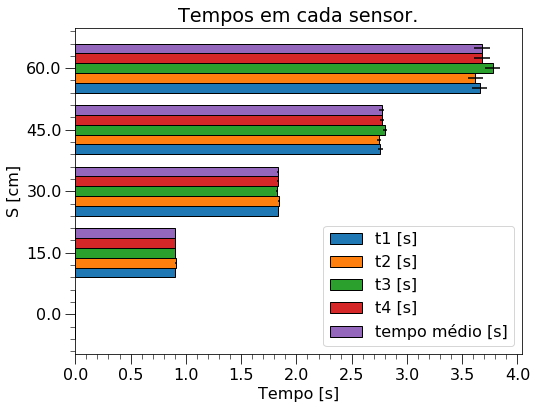

In [26]:
plot_bar_df_dados = df_dados.plot.barh(
    # para cada valor da variável x, teremos vários valores correspondentes
    # que serão comparados. No nosso caso, a variável x é a posição, e os 
    # valores comparados são os tempos de cada repetição e o valor médio
    
    xerr='desvio padrão [s]', #definimos os desvios dos valores
    x='S [cm]', # variável x, onde os valores serão comparados
    y=['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]', 'tempo médio [s]'], # valores comparados
    width=0.8, # define a espessura das barras
    edgecolor='#000000', # define a cor das bordas das barras
    title='Tempos em cada sensor.' # define o título da figura
)
plot_bar_df_dados.set_xlabel('Tempo [s]') # define o label do eixo x

<p class='justified'>
Podemos fazer a leitura do gráfico ficar um pouco melhor. Para isso, iremos mudar os labels dos ticks no eixo y. Para isso, usamos o método <mark class='mono_gray'>set_yticklabels()</mark> e passamos uma lista de strings que substituirão os valores presentes. Primeiro, vamos criar uma lista com os labels que queremos:
</p>

In [20]:
lista_de_labels = ['Sensor 1\n0,00 cm', 'Sensor 2\n15,00 cm', 'Sensor 3\n30,00 cm', 'Sensor 4\n45,00 cm', 'Sensor 5\n60,00 cm']

lista_de_labels

['Sensor 1\n0,00 cm',
 'Sensor 2\n15,00 cm',
 'Sensor 3\n30,00 cm',
 'Sensor 4\n45,00 cm',
 'Sensor 5\n60,00 cm']

<p class='justified'>
Lembrando que poderíamos ter usado uma lista de compreensão para criar a lista acima:
</p>

In [64]:
['Sensor ' + str(i+1) + '\n' + str(i*15) + ',00 cm' for i in range(5)]

['Sensor 1\n0,00 cm',
 'Sensor 2\n15,00 cm',
 'Sensor 3\n30,00 cm',
 'Sensor 4\n45,00 cm',
 'Sensor 5\n60,00 cm']

<p class='justified'>
Vamos então substituir os labels dos ticks do eixo y:
</p>

<a class='cell' id='figure_3'></a>

[Text(0, 0, 'Sensor 1\n0,00 cm'),
 Text(0, 0, 'Sensor 2\n15,00 cm'),
 Text(0, 0, 'Sensor 3\n30,00 cm'),
 Text(0, 0, 'Sensor 4\n45,00 cm'),
 Text(0, 0, 'Sensor 5\n60,00 cm')]

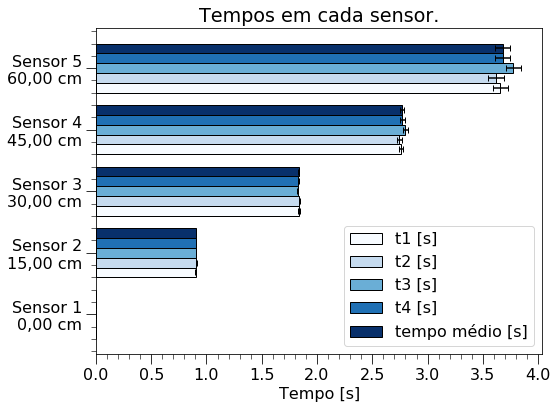

In [28]:
plot_bar_df_dados = df_dados.plot.barh(
    # para cada valor da variável x, teremos vários valores correspondentes
    # que serão comparados. No nosso caso, a variável x é a posição, e os 
    # valores comparados são os tempos de cada repetição e o valor médio
    xerr='desvio padrão [s]', # definimos os desvios dos valores
    x='S [cm]', # variável x, onde os valores serão comparados
    y=['t1 [s]', 't2 [s]', 't3 [s]', 't4 [s]', 'tempo médio [s]'], # valores comparados
    width=0.8, # define a espessura das barras
    edgecolor='#000000', # define a cor das bordas das barras
    capsize=3, # definimos o tamanho da barra perpendicular à barra de erro
    cmap='Blues', # definimos um map de cores para as barras em um valor de y
    title='Tempos em cada sensor.' # define o título da figura
)
plot_bar_df_dados.set_xlabel('Tempo [s]') # define o label do eixo x
plot_bar_df_dados.set_ylabel('') # deixamos em branco o label do eixo y
plot_bar_df_dados.set_yticklabels(lista_de_labels) # trocamos os labels dos ticks do eixo y

<p class='justified'>
    <b>Figura 3.</b> Gráfico de barras comparando os tempos cronometrados nos sensores em cada uma das repetições, incluindo valores médios. As barras de erro são respectivas aos desvios padrões.
</p>

<p class='justified'>
    Observe que também usamos a propriedade <mark class='mono_gray'>cmap</mark> para mudar as cores das barras em cada um dos valores de y, fornecendo o mapa de cores <mark class='mono_gray'>'Blues'</mark>.
</p>

<p class='justified'>
Com esse gráfico podemos confirmar que as repetições do experimento foram feitas de maneira que as condições foram mantidas praticamente iguais em cada uma das repetições. Veja que os valores representados por cada barra, em cada um dos sensores, não mudam quase nada de uma para outra. Isso acarreta em um valor médio muito próximo aos valores aferidos nas repetições e um desvio padrão muito pequeno, já que os valores de cada medida varia muito pouco em relação a média.
</p>

<p class='justified'>
    Vimos então que os tempos médios são provenientes de repetições experimentais que reproduzem adequadamente o mesmo comportamento físiso. Dessa forma, com os valores da posição $S$ e do tempo médio $t_m$ do <mark class='mono_gray'>DataFrame df_dados</mark>é fácil confeccionarmos o gráfico que estamos interessados (ver final da seção <a href='#experimento_1_mru'>3.1</a>):
</p>

<a class='cell' id='figure_4'></a>

Text(0, 0.5, 'Posição do móvel, S [cm]')

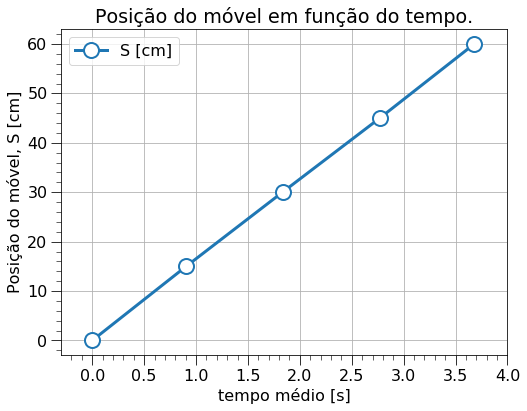

In [30]:
# agora confeccionamos o gráfico que nos diz
# como a posição do carro evolui com o tempo
plot_df_dados = df_dados.plot(
    x='tempo médio [s]',     # valores das variáveis independentes: eixo x
    y='S [cm]',              # valores das variáveis dependentes: eixo y
    style='-o',              # desenha as linhas que ligam os marcadores 'o'
    markersize=15,           # escolhe o tamanho do marcador/ponto
    markerfacecolor="white", # cor do interior do ponto
    markeredgewidth=2,       # escolhe a espessura da borda do marcador/ponto
    lw=3,                    # escolhe a espessura da linha que liga os pontos
    xlim=(-0.3, 4),          # muda o intervalo do eixo-x
    grid=True,               # desenha as linhas que acompanham os valores nos eixos    
    title='Posição do móvel em função do tempo.' # adiciona título ao gráfico
);

plot_df_dados.set_ylabel('Posição do móvel, S [cm]') # colocamos o label no eixo-y

<p class='justified'>
<b>Figura 4.</b> Gráfico da Posição $S\, (m)$ versus tempo médio $t_m\, (s)$, referente aos dados da <b>Tabela 5</b>.
</p>

<p class='justified'>
As opções colocadas nesse gráfico são as mesmas encontradas no gráfico da <a href='#figure_2'><b>Figura 2</b></a>. iremos manter um padrão para que você vá se habituando com os comandos. Contudo, eu encorajo vocês a mudar as opções e fazerem o gráfico ficar da maneira que preferirem. Isso ajuda a fixar melhor o conteúdo e também satisfaz o senso de estética de cada um. =)
</p>

<p class='justified'>
    Vemos claramente que o tipo de relação é <b>linear</b>!
    Dessa forma, podemos agora usar o método dos mínimos quadrados (Ref. <a href='#mukai'>[1]</a> Cap. 3 Págs. 26-29) para o caso da equação da reta e encontrar os coeficientes angular e linear.
</p>

# Ajuste do modelo linear
<a class="anchor" id="ajuste_do_modelo_linear"></a>

<p class='justified'>
Gráficos são excelentes ferramentas para analisar o comportamento de determinado evento, seja experimental, teórico ou via métodos numéricos. E para essa análise, normalmente se busca uma equação que faça um ajuste adequado , envolvendo os parâmetros dos dados analisados e condições iniciais adotadas. Intuitivamente o drimeiro passo é observar o comportamento da distribuição dos dados experimentais no gráfico.
</p>

<p class='justified'>
    No nosso caso, baseado na observação do gráfico no final da seção <a href='#confeccionando_o_grafico_sxt'>[5]</a>, vimos que os dados experimentais apontam na direção de um comportamento linear. Por essa razão, tentaremos aplicar um modelo matemático que consiste na equação da reta para ajustar os dados experimentais. Esse é conhecido como <mark class='mono_gray'>Método dos Mínimos Quadrados</mark>.
</p>

<p class='justified'>
Nosso objetivo nessa seção é encontrar uma reta que melhor descreva os dados experimentais. Para isso, iremos ajustar uma reta
</p>

$$
    y = a + bx,
$$

<p class='justified'>
em que $a$ e $b$ são os coeficientes linear e angular, respectivamente. Quando dissermos "ajustar", queremos dizer que queremos encontrar os melhores valores de $a$ e $b$ que façam a reta de ajuste ficar mais próxima possível dos dados. Veja o gráfico abaixo e tente mudar os coeficientes para que a reta vermelha se ajuste de maneira mais razoável possível aos dados.
</p>

In [11]:
import sys
sys.path.append('../')
from iterative_plots.iter_plots import *

In [15]:
mru_fit_iterative()

Loading BokehJS ...

<p class='justified'>
    Encontrou os valores de $a$ e $b$ que fazem o modelo linear mais se aproximar dos dados? Vamos ver agora como calcular os valores que fazem o ajuste ficar o mais próximo dos dados e ver se você obteve os valores corretos.
</p>

## Método dos mínimos quadrados
<a class='subsection' id='metodo_dos_minimos_quadrados'></a>

<p class='justified'>
Como mencionado anterioremente, iremos considerar a equação de primeiro grau que representa uma reta
</p>

$$
    y(x) = a + bx,
$$

<p class='justified'>
    em que $y(x)$ é a variável dependente, $a$ o coeficiente linear, $b$ o coeficiente angular e $x$ a variável independente. Segundo o método dos mínimos quadrados, na regressão linear o coeficiente linear $a$ é dado por
</p>

$$
a = \frac{\sum y \sum x^2 - \sum x \sum xy}{n\sum x^2 - \left(\sum x\right)^2}
\label{eq:coef_linear}
$$

<p class='justified'>
e o coeficiente angular $b$ é dado por
</p>

$$
b = \frac{n \sum xy - \sum x \sum y}{n\sum x^2 - \left(\sum x\right)^2}.
\label{eq:coef_angular}
$$

<p class='justified'>
Comparando com o nosso caso, o valor de $x$ é o da variável independente, isto é, o tempo médio $t_m$ referente a cada um dos sensores. O valor de $y$ é o da variável dependente, isto é, a posição $S(t)$ do móvel para um determinado tempo $t$. Aqui $n$ é o número de dados disponíveis. No caso do experimento, $n=5$, pois temos cinco sensores, tendo um valor da posição $S(t)$ e de tempo médio $t_m$ para cada um, inclusive a origem do movimento.
</p>

<p class='justified'>
Por exemplo, a soma $\sum y$ seria calculada como
</p>

$$
\begin{split}
    \sum y \to \sum S &= 0{,}00\,cm + 15{,}00\,cm + 30{,}00\,cm + 45{,}00\,cm + 60{,}00\,cm\\
    &= 150{,}00\,cm.
\end{split}
$$

<p class='justified'>
Já a soma $\sum x$ seria calculada como
</p>

$$
\begin{split}
    \sum x \to \sum t_m &= 0{,}000\,s + 0{,}905\,s + 1{,}833\,s + 2{,}770\,s + 3{,}684\,s \\
    &= 9{,}192\,s
\end{split}
$$

<p class='justified'>
Tomando o cuidado, pois existe uma diferença entre as somas $\left(\sum x\right)^2$ e $\sum x^2$. A primeira, soma-se todos os termos e então elevamos ao quadrado. Sendo assim, ela pode ser calculada simplesmente elevando o resultado da soma $\sum x$ ao quadrado:
</p>

$$
\begin{split}
    \left(\sum x\right)^2 \to \left(\sum \bar{t}\right)^2 &= \left(0{,}000\,s + 0{,}905\,s + 1{,}833\,s + 2{,}770\,s + 3{,}684\,s \right)^2\\
    &= \left(9{,}192\,s\right)^2 = 84{,}493\,s^2.
\end{split}
$$

<p class='justified'>
Observe que a unidade, segundos $s$, também foi elevada ao quadrado. Isso ocorre pois sempre devemos levar em consideração a unidade das quantidades que estamos lidando em nossos cálculos.
</p>

<p class='justified'>
Já na segunda soma, $\sum x^2$, cada um dos termos é elevado ao quadrado e somente então são somados:
</p>

$$
\begin{split}
    \sum \left(x\right)^2 = \sum \left(\bar{t}\right)^2 &= 
    \left(0{,}000\,s\right)^2 + 
    \left(0{,}905\,s\right)^2 + 
    \left(1{,}833\,s\right)^2 +\\ 
    &+\left(2{,}770\,s\right)^2 + 
    \left(3{,}684\,s \right)^2\\
    &= 25{,}424\,s^2.
\end{split}
$$

<p class='justified'>
Convenhamos que mesmo que o número de dados $n$ seja pequeno, calcular todas essas somas e depois substituí-las nas equações \eqref{eq:coef_linear} e \eqref{eq:coef_angular} é bastante trabalhoso. Por isso, escreveremos funções que permitiram calcular os valores dessas somas e nos retornar os valores dos coeficientes.
</p>

<p class='justified'>
Vamos começar escrevendo a função para o coeficiente linear $a$.
</p>

In [269]:
def coef_linear(x, y):
    """
    Dada a equação da reta y = a + bx, fornecidos os valores correspondentes 
    das variáveis independente (x) e dependente (y), calculá-se o coeficiente 
    linear (a).
    
    Argumentos:
    -----------
    x - list: lista com os valores da variável independente
    y - list: lista com os valores da variável dependente
    
    Retorno:
    --------
    A função retorna o valor do coeficiente linear da equação da reta, isto é,
    o valor de ``a`` na equação y = a + bx.
    """
    n = len(x)          # número de dados disponíveis
    
    s_y  = y.sum()      # calcula a soma dos valores em y
    s_x2 = (x**2).sum() # calcula a soma dos valores de x²
    
    s_x  = x.sum()      # calcula a soma dos valores em x
    s_xy = (x*y).sum()  # calcula a soma dos valores xy
    
    s_2x = x.sum()**2   # calcula a soma dos valores em x e depois eleva ao quadrado
    
    numerador   = s_y*s_x2 - s_x*s_xy # calcula o numerador do coeficiente linear
    denominador = n*s_x2 - s_2x       # calcula o denominador do coeficiente linear
    
    return round(numerador/denominador, 2) # retorna o valor do coeficiente linear arredondado 
                                           # conforme o número de algarismos significativos

<p class='justified'>
Da mesma forma, definimos uma função para calcular o coeficiente angular $b$:
</p>

In [266]:
def coef_angular(x, y):
    """
    Dada a equação da reta y = a + bx, fornecidos os valores correspondentes 
    das variáveis independente (x) e dependente (y), calculá-se o coeficiente 
    angular (b).
    
    Argumentos:
    -----------
    x - list: lista com os valores da variável independente
    y - list: lista com os valores da variável dependente
    
    Retorno:
    --------
    A função retorna o valor do coeficiente angular da equação da reta, isto é,
    o valor de ``b`` na equação y = a + bx.
    """
    n = len(x)          # número de dados disponíveis
    
    s_xy = (x*y).sum()  # calcula a soma dos valores de xy
    
    s_x  = x.sum()      # calcula a soma dos valores em x
    s_y  = y.sum()      # calcula a soma dos valores em y
    
    s_x2 = (x**2).sum() # calcula a soma dos valores de x²
    
    s_2x = x.sum()**2   # calcula a soma dos valores em x e depois eleva ao quadrado
    
    numerador   = n*s_xy - s_x*s_y # calcula o numerador do coeficiente angular
    denominador = n*s_x2 - s_2x    # calcula o denominador do coeficiente angular
    
    return round(numerador/denominador, 2) # retorna o valor do coeficiente angular arredondado 
                                           # conforme o número de algarismos significativos

<p class='justified'>
Como já mencionado, no nosso caso, a lista de valores contida na variável independente $x$ são as médias dos tempos em cada um dos sensores, isto é, os valores que se encontram na coluna <mark class='mono_gray'>tempos médios [s]</mark> do nosso <mark class='mono_gray'>DataFrame</mark>. Já a variável dependente $y$ se refere aos valores das posições dos sensores, fornecidos pela coluna <mark class='mono_gray'>s [cm]</mark> do nosso <mark class='mono_gray'>DataFrame</mark>. 
</p>

<p class='justified'>
Desta forma, para ajustar o modelo matemático que corresponde à equação da reta aos nossos dados, usamos esses valores nas funções definidas acima. Primeiramente, vamos encontrar o valor do coeficiente linear $a$:
</p>

In [270]:
# definindo as variáveis para usar na função
x = df_dados['tempo médio [s]'] # lista de valores dos tempos médios: variável independente x
y = df_dados['S [cm]']          # lista de valores das posições dos sensores: variável dependente y

a = coef_linear(x, y)
a

0.13

<p class='justified'>
    Usando as mesmas variáveis <mark class='mono_gray'>x</mark> e <mark class='mono_gray'>y</mark> definidas na célula acima, calculamos o valor do coeficiente angular:
</p>

In [271]:
b = coef_angular(x, y)
b

16.25

<p class='justified'>
    Portanto obteve-se que a equação da reta ajustada pelo método dos mínimos quadrados é dada por:
</p>

$$
    S(t) = 0{,}13 + 16{,}25 t.
$$

<p class='justified'>
    Para obter os valores de $S$ para cada tempo médio, basta substituir os valores do tempo médio e obter os dados para a reta ajustada.
</p>


<div align='center'>
<b>Tabela 6.</b> Dados da posição para cada tempo médio obtido experimentalmente, obtida usando a equação da reta ajustada, $S(t) = 0{,}13 + 16{,25}t$. 
    
| $t_m\, [s]$ | $S\,[cm]$ |
|:-----------:|:---------:|
|  $0{,}000$  |  $0{,}13$ |
|  $0{,}905$  | $15{,}00$ |
|  $1{,}833$  | $30{,}00$ |
|  $2{,}770$  | $45{,}00$ |
|  $3{,}684$  | $60{,}00$ |

</div>

Os valores de interesse foram obtidos. Contudo, ainda falta uma parte crucial: as unidades! É preciso em nossos cálculos levar em consideração as unidades das quantidades envolvidas. Para descobrir as unidades dos coeficiente linear $a$ e angular $b$, basta fazer uma análise dimensional nas equações \eqref{eq:coef_linear} e \eqref{eq:coef_angular}. Para a primeira delas, observe que ambos os termos do numerador possuem dimensões de $[y] \cdot [x]^2$ e do denominador de $[x]^2$:

$$
    [a] = \frac{[y]\cdot [x]^2}{[x]^2} = [y].
$$

Como no nosso caso $x \to \bar{t}$ e $y \to S$, temos

$$
    [a] = [S] = cm.
$$

No caso do coeficiente angular, ambos os termos do numerador possuem dimensões de $[x]\cdot[y]$ e do denominador $[x]^2$:

$$
    [b] = \frac{[x]\cdot[y]}{[x]^2} = \frac{[y]}{[x]}.
$$

Portanto, mais uma vez como $x \to \bar{t}$ e $y \to S$, temos

$$
    [b] = \frac{[S]}{[t]} = \frac{cm}{s}.
$$

Vemos então que a dimesão do coeficiente linear é de distância ($cm$) e a do coeficiente angular é de velocidade - distância por tempo - ($cm/s$).

Vamos agora juntar as informações obtidas nessa última parte para escrever o modelo que se ajusta aos dados experimentais.

1. Inspecionamos os dados em um gráfico de $S\times \bar{t}$ e observamos um comportamento linear;
2. A partir dessa observação, propomos um modelo linear para explicar o comportamento do fenômeno observado:
$$
    y = a + bx;
$$
3. Usamos o método dos mínimos quadrados para obter os coeficientes linear $a = 0{,}13$ e angular $b = 16{,}25$.
4. Fizemos uma análise dimensional para obter as unidades dos coeficientes, de maneira que 
$$
\begin{split}
    a &= 0{,}13\, &cm\\
    b &= 16{,}25\,&cm/s
\end{split}
$$
5. Finalmente podemos escrever a equação que melhor se ajusta aos dados experimentais:
$$
    y = 0{,}13 + 16{,}25 x
$$
ou em termos das variáveis físicas envolvidas
$$
    \hat{S}(t) = \left(0{,}13\,cm \right) + \left(16{,}25\,cm/s \right) t
$$
em que usamos um $\hat{S}$ para diferenciar o modelo teórico das posições experimentais $S$.

## Usando a função ``polyfit`` do ``numpy``
<a class='subsection' id='usando_a_funcao_polyfit_do_numpy'></a>

<p class='justified'>
Existe uma maneira bem mais fácil de se obter os coeficientes da reta a partir dos dados. Quando digo mais fácil, quero dizer em apenas uma linha código. Para isso, devemos usar a função <mark class='mono_gray'>polyfit</mark> do pacote <mark class='mono_gray'>numpy</mark>. Esse pacote já foi importado na <a href='#pacotes_e_funcoes'>seção 2</a>, mas vamos importá-lo novamente aqui:
</p>

In [495]:
# importamos o pacote ``numpy`` e vamos nos referir a ele como ``np``
import numpy as np

<p class='justified'>
    Para fazer uso da função <mark class='mono_gray'>polyfit</mark>, chamamos ela como <mark class='mono_gray'>np.polyfit(x, y, deg)</mark>. Os três parâmetros que devem ser passados à função são quase auto-explicativos:
</p>

```python
    x -> lista com valores das variáveis independentes
    y -> lista com valores das variáveis dependentes
    deg -> grau do polinômio que queremos ajustar aos dados x e y.
```

<p class='justified'>
No nosso caso, os valores das variáveis independentes são os tempos médios que o móvel leva para passa pelos sensores, armazenadas na variável <mark class='mono_gray'>tempo_medio</mark>. Já as variáveis dependentes são as posições experimentais dos sensores, armazenadas na variável <mark class='mono_gray'>posicao_experimental</mark>. Contudo, vamos reescrever essas variáveis para relembrar os valores que cada uma armazena.
</p>

In [505]:
tempo_medio          = [0.000, 0.905, 1.833, 2.770, 3.684] # em segundos, variável x na função ``polyfit``
posicao_experimental = [0.00 , 15.00, 30.00, 45.00, 60.00] # em cm, variável y na função ``polyfit``

<p class='justified'>
Como propomos um modelo linear para explicar o comportamento do móvel com o passar do tempo, estamos ajustando uma reta, um polinômio de grau 1, aos dados. Dessa forma, devemos usar
</p>

```python
    deg=1
```
<p class='justified'>
como terceiro argumento na função <mark class='mono_gray'>polyfit</mark>.
</p>

<p class='justified'>
Assim, substituindo os valores de forma adequada, devemos ter:
</p>

In [507]:
np.polyfit(x=tempo_medio, y=posicao_teorica, deg=1)

array([16.2503963 ,  0.13127144])

<p class='justified'>
    A função retorna um <mark class='mono_gray'>array</mark> com dois valores. O primeiro deles é o coeficiente angular e o segundo o coeficiente linear. Podemos arredondar esses valores para conter os algarismos signficativos provenientes dos nossos dados:
</p>

In [508]:
np.polyfit(x=tempo_medio, y=posicao_teorica, deg=1).round(2)

array([16.25,  0.13])

<p class='justified'>
    Veja que esses valores são exatamente os que foram obtidos usando as funções dos coeficientes angular e linear, respectivamente, na seção anterior. Vimos então, que usando apenas uma linha podemos encontrar os coeficientes do nosso modelo linear sem grandes problemas.
</p>

# Comparando o modelo com os dados
<a class='section' id='comprando_o_modelo_com_os_dados'></a>

## Comparações iniciais
<a class='subsection' id='comparacoes_iniciais'></a>

Podemos comparar o modelo teórico com os dados experimentais de diferentes formas. O primeiro método que podemos utilizar é via gráfico. Essa comparação qualitativa nos permite visualizar se o modelo teórico se aproxima bem dos dados obtidos experimentalmente. Se observamos uma concordância razoável, podemos partir para métodos quantitativo que complementarão nossos resultados e nos forneceram uma estimativa numérica do quão bom é o nosso modelo, isto é, o quão bem ele descreve os dados observados desse fenômeno.

Nas subseções a seguir, iremos discutir esses métodos e então sintetizar nossos resultados. Mas antes disso, para fazermos a comparação, precisamos analisar a equação da reta obtida com os coeficientes $a$ e $b$ e gerar as posições em função do tempo. 

Nosso modelo linear é dado pela equação

$$
    \hat{S}(t) = \left(0{,}13\,cm \right) + \left(16{,}25\,cm/s \right) t.
$$

Portanto, devemos usar os tempos cronometrados em cada um dos sensores para obter os valores das posições do móvel ao passar por cada um deles. Para isso, usaremos os valores médios dos tempos, calculados na seção [4.1.3](#calculando_a_media_dos_tempos_nos_sensores).

Para refrescar nossa memória, podemos obter os valores do ``DataFrame`` ``df_dados``:

In [260]:
df_dados['tempo médio [s]']

Sensor 1    0.000
Sensor 2    0.905
Sensor 3    1.833
Sensor 4    2.770
Sensor 5    3.684
Name: tempo médio [s], dtype: float64

Dessa forma, as posições do móvel fornecidas pelo modelo são:

$$
\begin{split}
    \text{Sensor 1} \to t &= 0{,}000 \to \hat{S}(0{,}000)\, &= \left( 0{,}13\,cm \right) + \left( 16{,}25\,cm/s \right)\left( 0{,}000\,s \right) &= \phantom{0}0{,}13\,cm,\\
    \text{Sensor 2} \to t &= 0{,}905 \to \hat{S}(0{,}905)\, &= \left( 0{,}13\,cm \right) + \left( 16{,}25\,cm/s \right)\left( 0{,}905\,s \right) &= 14{,}84\,cm,\\
    \text{Sensor 3} \to t &= 1{,}833 \to \hat{S}(1{,}833)\, &= \left( 0{,}13\,cm \right) + \left( 16{,}25\,cm/s \right)\left( 1{,}833\,s \right) &= 29{,}92\,cm,\\
    \text{Sensor 4} \to t &= 2{,}770 \to \hat{S}(2{,}770)\, &= \left( 0{,}13\,cm \right) + \left( 16{,}25\,cm/s \right)\left( 2{,}770\,s \right) &= 45{,}14\,cm,\\
    \text{Sensor 5} \to t &= 3{,}684 \to \hat{S}(3{,}684)\, &= \left( 0{,}13\,cm \right) + \left( 16{,}25\,cm/s \right)\left( 3{,}684\,s \right) &= 60{,}00\,cm.\\
\end{split}
$$

Assim, para colocar esses pontos no gráfico, juntamente com os dados experimentais, devemos criar uma lista com esses valores. Podemos fazer isso calculando cada um dos valores "na mão", como feito acima. Podemos criar uma função que descreva a posição teórica do móvel em função do tempo. Uma maneira de fazer isso é com o código abaixo:

In [276]:
def modelo_teorico(t):
    """
    Função que calcula as posições do móvel em um determinado instante t.
    A função, modelo linear, foi obtida a partir do método de mínimos
    quadrados ajustando os coeficientes linear e angular via método dos 
    mínimos quadrados. A função obtida a partir dos ajustes é escrita como
    S^(t) = (0.13 cm) + (16.25 cm/s)t
    
    Argumentos:
    -----------
    t - float: tempo, em segundos, no qual se quer saber a posição do móvel.
    
    Retorno:
    --------
    S^ - float: posição do móvel, em cm,  no instante de tempo t.
    """
    
    return round(0.13 + 16.25*t, 2)

Usando essa função podemos então calcular a posição teórica do móvel para cada instante de tempo $t$:

```python
    >>> modelo_teorico(0.000) 
        0.13
    >>> modelo_teorico(0.905)
        14.84
    >>> modelo_teorico(1.833)
        29.92
    >>> modelo_teorico(2.770)
        45.14
    >>> modelo_teorico(3.684)
        60.00
```

Contudo, ao invés de calcular cada um dos valores separadamente, podemos criar uma lista de valores diretamente usando uma ``lista de compreensão`` (``list comprehension``):

In [277]:
[modelo_teorico(t) for t in df_dados['tempo médio [s]']]

[0.13, 14.84, 29.92, 45.14, 60.0]

Vamos "quebrar" o código acima:

```python
    - df_dados['tempo médio [s]'] -> contém os valores dos tempos médios;
    - o comando for atribui à variável t um dos valores na lista de tempos em cada etapa do loop;
        - no primeiro passo do loop: t = 0.000
        - no segundo passo do loop : t = 0.905
            .
            .
            .
    - t, com seu respectivo valor, é injetado na função posicao_modelo
    - a função retorna o valor da posiçao do móvel
```

Atribuímos essa lista a uma variável chamada ``posicao_teorica``:

In [278]:
posicao_teorica = [modelo_teorico(t) for t in df_dados['tempo médio [s]']]
posicao_teorica

[0.13, 14.84, 29.92, 45.14, 60.0]

Com esses resultados, podemos já nos precipitar e dizer que o nosso modelo teórico é uma boa aproximação para o fenômeno observado no experimento. Comparando os valores das posições experimentais com as obtidas a partir do modelo, encontramos diferenças muito pequenas:

$$
\begin{split}
    &\text{Posições experimentais} &\to [0{,}00, 15{,}00, 30{,}00, 45{,}00, 60{,}00]\,cm,\\
    &\text{Posições teóricas}      &\to [0{,}13, 14{,}84, 29{,}92, 45{,}14, 60{,}00]\,cm,\\
    &\text{Diferença das posições} &\to [0{,}13, \phantom{0}0{,}16, \phantom{0}0{,}08, \phantom{0}0{,}14, \phantom{0}0{,}00]\,cm. 
\end{split}
$$

Vemos então que as diferenças, considerando valores absolutos, são muito pequenas.
Na próxima seção, veremos como isso é transmitido em um gráfico.

## Comparação via gráfico
<a class='subsection' id='comparacao_via_grafico'></a>

O primeiro método que iremos usar como comparação entre o modelo teórico obtido (equação da reta) e os dados experimentais é via gráfico. Iremos plotar os dados experimentais (mesmo gráfico da seção [5](#confeccionando_o_grafico_sxt)) e juntos a eles os resultados do modelo teórico. Abaixo, vamos escrever o código para confeccionar o gráfico que contém os dados experimentais e os resultados teoricos obtidos acima.

In [279]:
tempo_medio          = df_dados['tempo médio [s]'] # tempo médio do móvel em cada sensor
posicao_experimental = df_dados['S [cm]']          # posição experimental do móvel
posicao_teorica      = posicao_teorica             # posição teórica do móvel (redefinindo o valor obtido acima)

Temos tudo que precisamos para confeccionar o gráfico. O código para mostrar os valores teóricos e experimentais é escrito como:

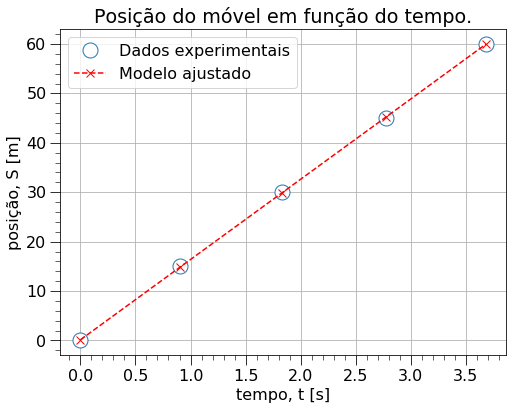

In [291]:
# primeiramente plotamos o gráfico com os dados experimentais
plt.plot(
    tempo_medio,                # primeiro argumento são os valores do eixo x
    posicao_experimental,       # segundo argumento são os valores do eixo y
    marker='o',                 # tipo do ponto usado para marcar as coordenadas (x,y)
    markersize=15,              # muda o tamanho dos pontos
    markerfacecolor="#FFFFFF",  # muda a cor interna dos pontos
    lw=0,                       # faz a linha que liga os pontos ter espessura (width) 0
    label='Dados experimentais' # nome para colocar na legenda
);

# agora plotamos os valores teóricos. Para cada posição téorica usamos os tempos médios respectivos
plt.plot(
    tempo_medio,            # primeiro argumento são os valores do eixo x
    posicao_teorica,        # segundo argumento são os valores do eixo y
    marker='x',             # tipo do ponto usado para marcar as coordenadas (x,y)
    markersize=8,           # muda o tamanho dos pontos
    color='#FF0000',        # muda a cor interna dos pontos
    ls='--',                # muda o estilo da linha que liga os pontos para tracejado
    label='Modelo ajustado' # nome para colocar na legenda
)

# adicionamos uma legenda para ajudar na leitura do gráfico
# a legenda incluirá os ``label's`` adicionados em cada plot.
plt.legend()

# desenha as linhas que acompanham os valores nos eixos
plt.grid()

# é importante colocar o nome das quantidade nos eixos
plt.xlabel('tempo, t [s]');
plt.ylabel('posição, S [m]');
plt.title('Posição do móvel em função do tempo.');

Observe como os pontos do ``Modelo ajustado`` "cai" bem em cima dos pontos dos ``Dados experimentais``. Isso é um indicativo de que o ajuste ao modelo linear proposto é bom. A partir dessa análisa qualitativa, vamos então obter algumas estimativas numéricas do quão bom nosso modelo é para descrever os dados experimentais, isto é, o cenário experimental que trabalhamos.

## Comparação via desvio percentual
<a class='subsection' id='comparacao_via_desvio_percentual'></a>

O **desvio percentual** é utilizado quando se compara uma medida experimental com um valor teórico. Suponha que estamos interessados em comparar uma quantidade $X$ entre o experimento e o modelo teórico. Usando o desvio percentual, podemos fazer isso utilizando a seguinte expressão:

$$
    D_X = \left| \frac{X_{teórico} - X_{experimental}}{X_{experimental}} \right|\cdot 100\%.
$$

No nosso caso, a quantidade que queremos comparar entre os dados experimentais e teóricos é a velocidade $v$ do móvel. Portanto, nesse cenário, devemos calcular:

$$
    D_v = \left| \frac{v_{teórico} - v_{experimental}}{v_{experimental}} \right|\cdot 100\%.
    \label{eq:desvio_perc_v}
$$

Como vimos na seção [3.1](#breve_revisao_teorica), a velocidade pode ser obtida calculando o coeficiente da reta no gráfico $S\times t$. Podemos então obter as velocidade experimental e teórica usando dois pontos em suas respectivas retas (gráfico acima) e compará-las usando a equação \eqref{eq:desvio_perc_v}. As inclinações dessas retas podem ser obtidas então por meio das equações

$$
\begin{split}
    v_{experimental} &= \frac{\Delta S}{\Delta t}\\ 
    v_{teórico}      &= \frac{\Delta \hat{S}}{\Delta t}\\
\end{split}
$$

Para calcular as velocidades, consideraremos os tempos dos sensores 3 e 4. Assim, experimentalmente temos:

$$
\begin{split}
    v_{experimental} &= \frac{\Delta S}{\Delta t} = \frac{S(t=2{,}770\,s)-S(t=1{,}833\,s)}{2{,}770\,s -1{,}833\,s}\\
                     &= \frac{45{,}00\,cm - 30{,}00\,cm}{0{,}937\,s} = \frac{15{,}00\,cm}{0{,}937\,s}\\ 
                     &= 16{,}01\,cm/s.
\end{split}
$$

Já para a teórica:

$$
\begin{split}
    v_{teórica} &= \frac{\Delta \hat{S}}{\Delta t} = \frac{\hat{S}(t=2{,}770\,s)-\hat{S}(t=1{,}833\,s)}{2{,}770\,s -1{,}833\,s}\\ 
                &= \frac{45{,}14\,cm - 29{,}92\,cm}{0{,}937\,s} = \frac{15{,}22\,cm}{0{,}937\,s}\\ 
                &= 16{,}24\,cm/s.
\end{split}
$$

Substituindo esses valores na expressão \eqref{eq:desvio_perc_v}, encontramos

$$
    D_v = \left| \frac{16{,}01\,cm/s - 16{,}24\,cm/s}{16{,}01\,cm/s} \right|\cdot 100\% = \left| \frac{-0{,}23\,cm/s}{16{,}01\,cm/s} \right|\cdot 100\% = 0{,}01 \cdot 100\% = 1{,}00\%
$$

A conclusão que temos desse resultado é de que a velocidade obtida a partir dos dados experimentais quando comparada com aquela obtida a partir do modelo teórico proposto e ajustado é de apenas $1{,}00\%$. Esse resultado nos mostra que os resultados obtidos a partir do modelo teórico desviam muito pouco do que é observado experimentalmente, e pode ser usado para descever o fenômeno observado.

## Comparação via $R^2$
<a class='subsection' id='comparacao_via_r2'></a>

O $R^2$, também conhecido como coeficiente de determinação, é um número que estima o quão bom o nosso ajuste matemático (nosso modelo teórico) concorda com os dados. Seu valor está entre 0 e 1 ($R^2 \in [0,1]$), onde o primeiro indica uma discrepância total entre o modelo e os dados e o segundo caso um "casasmento" perfeito.
Nessa seção iremos aprender como calcular essa quantidade e então ter uma medida quantitativa que nos diz sobre a qualidade do nosso modelo comparado com os dados.

A primeira etapa para se calcular o $R^2$ é calcular o valor médio dos dados observados, isto é, os dados que foram usados para ajustar o modelo teórico. No nosso caso esses correspondem aos dados experimentais, referentes às posições dos sensores, $S$. Assim, a primeira quantidade que devemos obter é:

$$
    \bar{S} = \frac{1}{n}\sum\limits_{i=1}^{n}S_i,
$$

isto é, a soma de todas as posições dos sensores dividida pelo número total de posições disponíveis, no caso $n=5$. Calculando essa quantidade, temos

$$
\begin{split}
    \bar{S} &= \frac{1}{5} \left(0{,}00\,cm + 15{,}00\,cm + 30{,}00\,cm + 45{,}00\,cm + 60{,}00\,cm \right)\\
    \bar{S} &= \frac{150{,}00\,cm}{5}\\
    \bar{S} &= 30{,}00\,cm.
\end{split}
$$

A segunda quantidade é a soma dos quadrados das diferenças entre os dados e o valor médio. Confuso? Para calcular essa quantidade, pegamos cada uma das posições dos sensores $[0{,}00, 15{,}00, 30{,}00, 45{,}00, 60{,}00]\,cm$ e subtraímos da média que acabamos de calcular:

$$
    [0{,}00, 15{,}00, 30{,}00, 45{,}00, 60{,}00]\,cm - 30{,}00\,cm
$$

que nos fornecerá

$$
    [-30{,}00, -15{,}00, 0{,}00, 15{,}00, 30{,}00]\,cm.
$$

Em seguida, cada um desses valores é elevado ao quadrado

$$
    [900{,}00, 225{,}00, 0{,}00, 225{,}00, 900{,}00]\,cm^2
$$

e então são somados, resultando em $2.250{,}00\,cm^2$.

Em termos de uma única soma, escrevemos apenas

$$
    SS_{tot} = \sum\limits_{i=1}^{n}\left( S_i - \bar{S}\right)^2,
$$

que, como já vimos, é 

$$
    SS_{tot} = 2.250{,}00\,cm^2.
$$

<!--A próxima quatidade que precisamos é muito parecida de se calcular quando comparada com a anterior. A única diferença é que ao invés de usar os dados experimentais, usamos os valores obtidos do modelo teórico, no nosso caso, os valores de $\hat{S}$. Assim, temos que calcular a soma dos quadrados da regressão:

$$
    SS_{reg} = \sum\limits_{i=1}^{n} \left(\hat{S}_i - \bar{S}\right)^2.
$$

Usando os valores obtidos do modelo temos então:

$$
\begin{split}
    SS_{reg} &= \left( 0{,}13\,cm - 30{,}00\,cm\right)^2 
              + \left(14{,}84\,cm - 30{,}00\,cm\right)^2 
              + \left(29{,}92\,cm - 30{,}00\,cm\right)^2\\
             &+ \left(45{,}14\,cm - 30{,}00\,cm\right)^2
              + \left(60{,}00\,cm - 30{,}00\,cm\right)^2\\
    SS_{reg} &= 2.251{,}27\,cm^2
\end{split}
$$ -->
A próxima quantidade que precisamos é a soma dos quadrados dos resíduos. O resíduo é definido como sendo o valor do dado experimental menos o valor teórico. No nosso caso, o resíduo é definido como

$$
    e_i = S_i - \hat{S}_i.
$$

Assim, temos que calcular a soma

$$
    SS_{res} = \sum\limits_{i=1}^{n} \left( S_i - \hat{S}_i \right)^2 = \sum\limits_{i=1}^{n} e^2_i.
$$

Se observarmos bem, os resíduos já foram calculados no final da seção [7.1](#comecando_as_comparacoes). Usando os valores obtidos, temos


$$
\begin{split}
    SS_{res} &= \left( -0{,}13\,cm\right)^2 
              + \left(  0{,}16\,cm\right)^2 
              + \left(  0{,}08\,cm\right)^2 
              + \left( -0{,}14\,cm\right)^2 
              + \left(  0{,}00\,cm\right)^2 \\
    SS_{res} &= 0{,}07\,cm^2.
\end{split}
$$

Agora usamos a expressão

$$
    R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

para calcular o coeficiente de determinação. Substituindo os valores das somas calculadas anteriorementes, temos

$$
    R^2 = 1 - \frac{0{,}07\,cm^2}{2.250{,}00\,cm^2}
$$

E finalmente obtemos 

$$
    R^2 = 1.
$$

Esse resultado nos informa que, quantitativamente, nosso ajuste realizado a partir de um modelo linear é perfeito. Esse resultado pode ser corroborado pelas análises feitas anteriormente: 

- as pequenas diferenças nos valores entre os dados experimentais e os valores teóricos ([7.1](#comparacoes_iniciais));
- o colapso dos pontos experimentais e teóricos no gráfico ([7.2](#comparacao_via_grafico));
- o desvio percentual baixíssimo entre as velocidades experimental e teórica ([7.3](#comparacao_via_desvio_percentual));

# Conclusões
<a class='section' id='conclusoes'></a>

O experimento consistiu em obter dados das quatro realizações experimentais, onde foram aferidos os tempos em que o móvel levada para passar por cada um dos sensores. A partir desses, os tempos médios que levava para o móvel passar por cada um dos sensores foi calculado. Tínhamos como objetivo observar o tipo de comportamento entro a posição dos sensores ($S$) e o tempo ($t$) que levava para o móvel passar por eles. Para uma inspeção mais visual, confeccionamos um gráfico $S\times t$, constatando uma relação linear entre essas quantidades.

Propomos então um modelo linear para ajustar os dados experimentais. Usando as expressões proveninentes do método de mínimos quadrados, calculamos os coeficientes linear $a$ e angular $b$ da reta. Encontramos suas respectivas unidades e então escrevemos a equação do nosso modelo, ou seja, para estimar a posição do móvel em um instante de tempo $t$. A equação obtida foi

$$
    \hat{S}(t) = \left( 0{,}13\,cm \right) + \left( 16{,}25\,cm/s\right) t.
$$

A partir dela, usamos os tempos médios encontrados experimentalmente e fizemos uma predição dos valores teóricos das posições. Essas foram comparadas às posições experimentais via gráfico, onde observamos uma boa concordância qualitativa. Contudo, precisamos de algo mais do que uma inspeção visual. Quantitativamente, comparamos as velocidades experimentais e proveninentes do modelo usando o desvio percentual. Os resultados obtidos foram de que o desvio entre essas quantidades era de $1{,}00\%$, um valor muito pequeno, apontando na direção de que o modelo ajusta bem os dados. Por fim, calculamos o coeficiente de determinação $R^2$. O resultado encontrado corroborou com os anteriores, já que $R^2 = 1{,}00$ corresponde a uma descrição perfeita do modelo quando comparado com os dados experimentais.

Verificamos que a equação horária de um movimento retilíneo com velocidade uniforme se adequou perfeitamente às observações experimentais.

# * Ajustando os dados com regressão linear
<a class='section' id='ajustando_os_dados_com_regressao_linear'></a>

Nessa seção extra, usaremos uma função já implementada para fazer a **regressão linear** a partir dos dados experimentais. Usaremos o pacote [``sklearn``](https://scikit-learn.org/stable/index.html) (*scikit-learn*), que possui várias ferramentas para **aprendizado de máquina** (*machine learning*). Apesar dessa seção ser breve, iremos separá-la em subseções para que o aprendizado do método seja fracionado e que os conceitos, em sua respectiva ordem, fiquem mais claros e para melhor referência em caso de dúvidas.

## Importanto os pacotes necessários
<a class='subsection' id='importando_os_pacotes_necessarios'></a>

Na célula abaixo, vamos importar o objeto ``LinearRegression``. Para isso, procuramos dentro do pacote ``sklearn`` o módulo ``linear_model`` e importamos o objeto ``LinearRegression``:

In [451]:
from sklearn.linear_model import LinearRegression

Para usar essa função, nossas variáveis dependentes (posição dos sensores, $S$) e independentes (tempo médio nos sensores, $\bar{t}$) devem estar representadas como ``numpy arrays`` em uma forma específica. Vamos entender como transformar nossas listas de valores para o formato necessário. O pacote ``numpy`` já foi importado no começo desse módulo(Seção [2](#pacotes_e_funcoes)), mas vamos importá-lo novamente:

In [463]:
import numpy as np # importamos o pacote ``numpy`` como ``np``

## Reestruturando os dados
<a class='subsection' id='reestruturando_os_dados'></a>

Vamos relembrar primeiramente dos nossos dados, invocando o ``DataFrame`` que definimos durante a seção [4](#analisando_os_dados_obtidos_com_python):

In [452]:
df_dados

,S [cm],t1 [s],t2 [s],t3 [s],t4 [s],tempo médio [s]
Sensor 1,0.0,0.000,0.000,0.000,0.000,0.000
Sensor 2,15.0,0.901,0.909,0.906,0.904,0.905
Sensor 3,30.0,1.836,1.840,1.824,1.831,1.833
Sensor 4,45.0,2.760,2.746,2.800,2.773,2.770
Sensor 5,60.0,3.658,3.620,3.776,3.684,3.684


As únicas colunas que nos interessam para criar o modelo linear, são ``S [cm]`` e ``tempo médio [s]``. Dessa forma, vamos criar duas novas variáveis, cada uma contendo os valores dessas colunas. Esse procedimento já foi realizado na seção [7.2](#comparacao_via_grafico) e aqui usaremos exatamente os mesmos nomes para as variaveis:

In [ ]:
tempo_medio          = df_dados['tempo médio [s]'] # tempo médio do móvel em cada sensor
posicao_experimental = df_dados['S [cm]']          # posição experimental do móvel

Observe como são os valores dessas variáveis:

In [453]:
tempo_medio

Sensor 1    0.000
Sensor 2    0.905
Sensor 3    1.833
Sensor 4    2.770
Sensor 5    3.684
Name: tempo médio [s], dtype: float64

In [454]:
posicao_experimental

Sensor 1     0.0
Sensor 2    15.0
Sensor 3    30.0
Sensor 4    45.0
Sensor 5    60.0
Name: S [cm], dtype: float64

Precisamos transformá-las para que elas sejam um ``numpy array`` da seguinte forma:

```python
array([[valor 1],
       [valor 2],
       [valor 3],
          .
          .
          .
       [valor n]])
```

Para isso, primeiramente usamos o método ``asarray()`` do pacote ``numpy`` que importamos como ``np``, veja como fica o código quando aplicado na variável ``tempo_medio``:

In [456]:
np.asarray(tempo_medio)

array([0.   , 0.905, 1.833, 2.77 , 3.684])

Quase lá! Agora precisamos reestruturar o ``array`` para que ele fique como o mostrado mais acima. Para isso, aplicamos o método ``reshape()`` com dois argumentos, ``-1`` e ``1``, respectivamente:

In [457]:
np.asarray(tempo_medio).reshape(-1,1)

array([[0.   ],
       [0.905],
       [1.833],
       [2.77 ],
       [3.684]])

Pronto! Transformamos nossa lista de valores inicial em um ``numpy array`` que pode ser usado no método de regressão linear do pacote ``sklearn``. Vamos então transformar nossas listas de valores em ``arrays`` e reestruturá-los em uma única linha de código e atribuí-los em novas variáveis:

In [459]:
array_tempo_medio          = np.asarray(tempo_medio).reshape(-1,1)
array_posicao_experimental = np.asarray(posicao_experimental).reshape(-1,1)

Temos então os ``arrays``:

In [460]:
array_tempo_medio

array([[0.   ],
       [0.905],
       [1.833],
       [2.77 ],
       [3.684]])

In [461]:
array_posicao_experimental

array([[ 0.],
       [15.],
       [30.],
       [45.],
       [60.]])

Com isso estamos preparados para fazer a regressão linear, isto é, ajustar os dados a um modelo que supõe a equação de uma reta:

$$
    \hat{y} = a + bx.
$$

Reescrevendo a equação desse modelo linear em termos das quantidades de interesse do nosso experimento, temos

$$
    \hat{S} = a + b t.
$$

Se fizermos uma pequena análise dimensional, do lado direito, ambos os termos devem ter dimensão de $cm$. Dessa forma, temos

$$
    [a] = cm
$$

e, como medimos o tempo em segundos,

$$
    [b][t] = cm \to [b] = \frac{cm}{[t]} = \frac{cm}{s}.
$$

Vemos então que $a$ possui dimensão de distância e $b$ possui dimensão de velocidade. Assim, reescrevemos nosso modelo linear como

$$
    \hat{S} = \hat{S}_0 + \hat{v}t
$$

em que usamos $\hat{}$ para sinalizar que as variáveis são provenientes de um modelo teórico. 

## Criando o objeto o regressão linear e fitando os dados ao modelo
<a class='subsection' id='criando_o_objeto_de_regressao_linear_e_fitando_os_dados_ao_modelo'></a>

O primeiro passo em criar um modelo para nossos dados usando o pacote ``sklearn`` é criar o objeto ``LinearRegression``. Para fazer isso, vamos atribuir esse objeto à variável que chamaremos de ``regressao``:

In [464]:
regressao = LinearRegression()

O próximo passo agora é passar o método ``fit()`` a esse objeto com dois parâmetros: as variáveis independente e dependente, respectivamente. No nosso caso, temos

```python
    variável independente -> eixo x -> array_tempo_medio
    variável dependente   -> eixo y -> array_posicao_experimental
```

Isso fará o ajuste do modelo linear (equação da reta) aos dados e nos fornecerá o modelo, com os coeficientes linear $a$ e angular $b$. Dessa forma, iremos atribuir esse fit, a criação do nosso modelo, à variável ``modelo``:

In [468]:
#        variáveis      independente: x    dependente: y                
modelo = regression.fit(array_tempo_medio, array_posicao_experimental)

Agora que nosso modelo foi criado, podemos ver quais os valores de $a$ e $b$ foram encontrados. O valor do coeficiente linear, é exatamente o valor em que a reta intercepta o eixo $y$, no nosso caso, seria a posição teórica inicial do móvel. Para obter essa quantidade então a partir do ``modelo``, usamos o código

In [469]:
# valor do coeficiente linear ``a``, valor onde o eixo y é interceptado
modelo.intercept_

array([0.13415777])

Arredondando esse valor para dois algarismos significativos (caso surja alguma dúvida do motivo do arrendondamento, consulte a seção 2.6, pág. 15, Ref. [[1]](#mukai)):

In [470]:
modelo.intercept_.round(2)

array([0.13])

Observe que esse valor é exatamente o mesmo que encontramos usando a equação \eqref{eq:coef_linear}.

Para encontrar o valor do coeficiente angular, usamos o seguinte comando:

In [471]:
modelo.coef_

array([[16.24556257]])

E seu valor arredondado adequadamente se escreve

In [472]:
modelo.coef_.round(2)

array([[16.25]])

Por sua vez, esse valor também é idêntico ao encontrado usando a equação \eqref{eq:coef_angular}.

Portanto, temos que 

$$
\begin{split}
    \hat{S}_0 &= \phantom{0}0{,}13\,cm\\
    \hat{v}   &= 16{,}25\,cm/s.
\end{split}
$$

Dessa forma, nosso modelo é escrito como

$$
    \hat{S}(t) = \left( 0{,}13\,cm \right) + \left( 16{,}25\,cm/s \right)t.
$$

Então, quando usarmos nosso ``modelo`` para fazer a predição dos valores de $\hat{S}$, devemos usar os valores dos tempos em que o móvel passou pelos sensores. Se as posições preditas pelo modelo forem semelhantes às posições experimentais o nosso modelo linear é bom. Para fazer essa predição, usamos o método ``predict()`` e forncemos como paramêtro a variável independente, que no nosso caso são os tempos médios cronometrados nos sensores, atribuídos à variável ``array_tempo_medio``. O código fica assim

In [473]:
# guardamos os valores preditos usando os tempos medios na variável ``array_posicao_teorica``
array_posicao_teorica = modelo.predict(array_tempo_medio)

Vamos ver então quais foram os valore preditos pelo nosso modelo:

In [474]:
array_posicao_teorica

array([[ 0.13415777],
       [14.83639189],
       [29.91227396],
       [45.13436609],
       [59.98281028]])

Mais uma vez, arredondamos os valores das posições obtidas:

In [475]:
array_posicao_teorica.round(2)

array([[ 0.13],
       [14.84],
       [29.91],
       [45.13],
       [59.98]])

Vemos que esses valores são muito próximos aos valores experimentais, o que é um ótimo sinal da qualidade do ajuste. 

## Testando a qualidade do modelo: $R^2$ e gráfico
<a class='subsection' id='testando_a_qualidade_do_modelo_r2_e_grafico'><a/>

Podemos quantificar a qualidade do ajuste por meio do $R^2$ usando nosso ``modelo``. Para isso, basta usarmos o método ``score()`` e passar dois argumentos: as variáveis independente e a dependente, respectivmente. Assim, no nosso caso, temos

In [476]:
modelo.score(array_tempo_medio, array_posicao_experimental)

0.9999685282180711

Vemos então que esse é um valor muito próximo de um, que se for arredondado:

In [477]:
modelo.score(array_tempo_medio, array_posicao_experimental).round(2)

1.0

dá 1,0, como encontrado anteriormente.

Por fim, podemos confeccionar um gráfico que mostra os valores experimentais e aqueles preditos pelo ``modelo``:

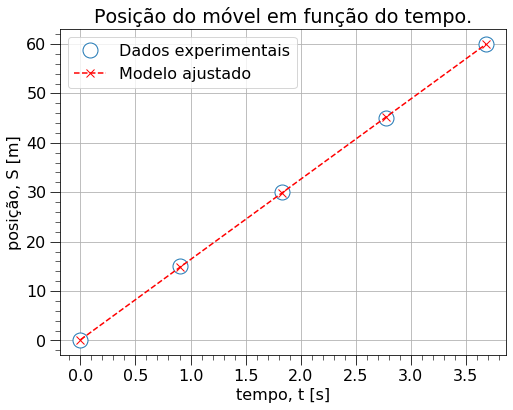

In [479]:
# primeiramente plotamos o gráfico com os dados experimentais
plt.plot(
    array_tempo_medio,          # primeiro argumento são os valores do eixo x
    array_posicao_experimental, # segundo argumento são os valores do eixo y
    marker='o',                 # tipo do ponto usado para marcar as coordenadas (x,y)
    markersize=15,              # muda o tamanho dos pontos
    markerfacecolor="#FFFFFF",  # muda a cor interna dos pontos
    lw=0,                       # faz a linha que liga os pontos ter espessura (width) 0
    label='Dados experimentais' # nome para colocar na legenda
);

# agora plotamos os valores teóricos. Para cada posição téorica usamos os tempos médios respectivos
plt.plot(
    array_tempo_medio,      # primeiro argumento são os valores do eixo x
    array_posicao_teorica,  # segundo argumento são os valores do eixo y
    marker='x',             # tipo do ponto usado para marcar as coordenadas (x,y)
    markersize=8,           # muda o tamanho dos pontos
    color='#FF0000',        # muda a cor interna dos pontos
    ls='--',                # muda o estilo da linha que liga os pontos para tracejado
    label='Modelo ajustado' # nome para colocar na legenda
)

# adicionamos uma legenda para ajudar na leitura do gráfico
# a legenda incluirá os ``label's`` adicionados em cada plot.
plt.legend()

# desenha as linhas que acompanham os valores nos eixos
plt.grid()

# é importante colocar o nome das quantidade nos eixos
plt.xlabel('tempo, t [s]');
plt.ylabel('posição, S [m]');
plt.title('Posição do móvel em função do tempo.');

Vemos que o modelo ajustado tem seus pontos coincidindo com os dados experimentais. Portanto, devido ao resultado quantitativo do coeficiente de determinação ser máximo, isto é, $R^2 = 1{,}00$ e uma inspeção gráfica nos mostrar que o modelo ajusta de fato os dados experimentais, concluímos que o modelo linear obtido descreve o fenônome do móvel andando sobre o trilho de ar, em uma dimensão com velocidade constante.